# Big Data/Data Mining Assessment

### Importing relevant libraries/modules

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import folium
import pandas as pd
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster
from IPython.display import display
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from mlxtend.frequent_patterns import apriori, association_rules

### Creating a connection to the database

In [2]:
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

### Creating a cursor

In [3]:
cur = con.cursor()

### Identifying the tables in the database

In [4]:
# Execute the query to get table names
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
table_names = cur.fetchall()

# Print the table names
for name in table_names:
    print(name[0])

accident
casualty
vehicle
lsoa


- The database comprises several tables, including: accident, casualty, vehicle, and lsoa.

### Viewing the attributes (columns) of the tables in the database

In [5]:
# Viewing the attributes (columns) in the accident table
col_info = cur.execute(f"PRAGMA table_info(accident)")
accident_columns = col_info.fetchall()
accident_columns

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [6]:
# Viewing the attributes (columns) in the vehicle table
col_info = cur.execute(f"PRAGMA table_info(vehicle)")
vehicle_columns = col_info.fetchall()
vehicle_columns

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [7]:
# Viewing the attributes (columns) in the casualty table
col_info = cur.execute(f"PRAGMA table_info(casualty)")
casualty_columns = col_info.fetchall()
casualty_columns

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [8]:
# Viewing the attributes (columns) in the lsoa table
col_info = cur.execute(f"PRAGMA table_info(lsoa)")
lsoa_columns = col_info.fetchall()
lsoa_columns

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

### 1. Hours of the Day and Days of the Week for Accidents:
In this task, our concentration will be entirely directed towards crucial attributes, namely the accident index, time, and the day of the week. As a component of the feature engineering process, we will derive the hour feature from the time attribute.

In [9]:
# Extracting relevant columns from the accident table
cur.execute("""
SELECT A.accident_index, A.time, A.day_of_week
FROM Accident A
WHERE A.accident_year = 2020;
""")
accidents_data = cur.fetchall()

# Creating a pandas DataFrame to store the results
columns = ['accident_index', 'time', 'day_of_week']
accident_df = pd.DataFrame(accidents_data, columns=columns)
accident_df.head()

accident_index   time  day_of_week
0  2020010219808  09:00            3
1  2020010220496  13:55            2
2  2020010228005  01:25            4
3  2020010228006  01:50            4
4  2020010228011  02:25            4

### Feature Engineering

In [10]:
# Extract hour and day of the week from the datetime column
accident_df['hour'] = pd.to_datetime(accident_df['time'], format="%H:%M").dt.hour

In [11]:
# Displaying the updated dataframe
accident_df

accident_index   time  day_of_week  hour
0      2020010219808  09:00            3     9
1      2020010220496  13:55            2    13
2      2020010228005  01:25            4     1
3      2020010228006  01:50            4     1
4      2020010228011  02:25            4     2
...              ...    ...          ...   ...
91194  2020991027064  14:30            4    14
91195  2020991029573  15:05            6    15
91196  2020991030297  12:42            4    12
91197  2020991030900  14:00            3    14
91198  2020991032575  13:50            3    13

[91199 rows x 4 columns]

### Defining a function for the plots

In [12]:
def countplot_distribution(data, x_column, color, x_ticks=None, x_tick_labels=None, title="", x_label="", y_label="Number of Accidents"):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=data, x=x_column, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if x_ticks and x_tick_labels:
        plt.xticks(x_ticks, x_tick_labels)
    
    ax.set_yticks([])  # Remove y-axis ticks
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9, color='black')
    
    plt.show()

# Substituting the encoded days of the week with their corresponding words
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

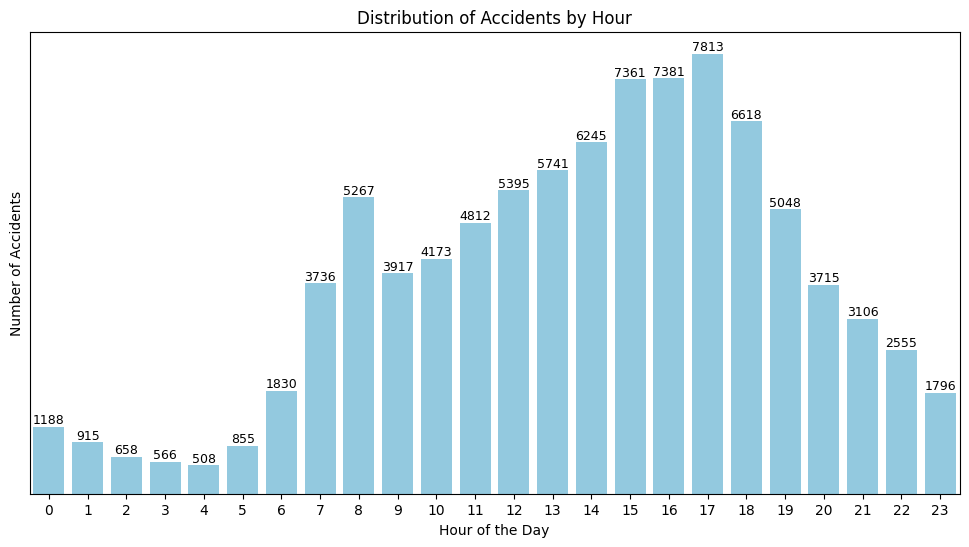

In [13]:
# Calling the function to plot the distribution of accidents by hour
countplot_distribution(accident_df, x_column='hour', color='skyblue', x_ticks=range(0, 24),
                        title='Distribution of Accidents by Hour', x_label='Hour of the Day')

- The count plot illustrates daily accident trends, with a gradual rise from 5:00 AM to a peak at 5:00 PM (17:00 hours), followed by a decline until around 4:00 AM, then rising again. 5:00 PM exhibits the most accidents, linked to rush hour traffic. The lower counts from 1:00 AM to 4:00 AM suggest safer early hours, with reduced traffic. Factors like weather, rush hour traffic, evening rush, and driver fatigue could influence the 5:00 PM peak. Understanding these trends is crucial for effective traffic management and safety strategies during peak accident-prone times.

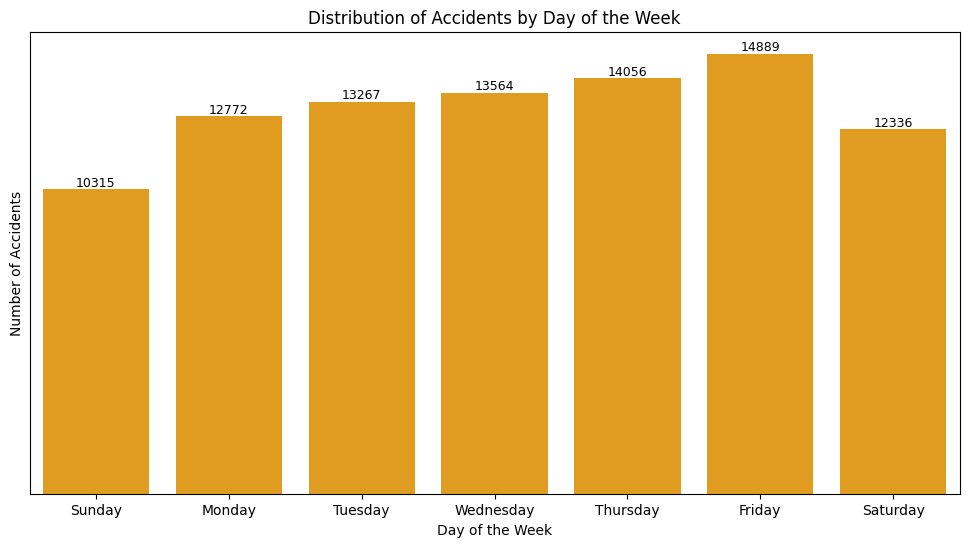

In [14]:
# Calling the function to plot the distribution of accidents by day of the week
countplot_distribution(accident_df, x_column='day_of_week', color='orange', x_ticks=range(7), 
                        x_tick_labels=days, title='Distribution of Accidents by Day of the Week', 
                        x_label='Day of the Week')

- The accident count plot highlights weekday patterns. Friday has the most accidents (14,889), possibly due to weekend preparation and social activities. Thursday (14,056) follows, indicating similar reasons. Wednesday (13,564) and Tuesday (13,267) maintain mid-week high counts. Monday (12,772) reflects early-week stress and readjustment. Saturday (12,336) sees fewer accidents, tied to leisure. Sunday records the least (10,315) due to leisure and less work-related travel. This pattern guides safety measures and traffic management, targeting high-risk weekdays for interventions.

### 2. Hours of the Day and Days of the Week for Motorbike Accidents:
For this task, our primary emphasis will be on extracting essential attributes from both the accident and vehicle tables. These attributes encompass the accident index, time, vehicle type, and the day of the week. As a pivotal step within the feature engineering procedure, we will generate the hour feature from the time attribute. Of particular relevance is the vehicle type feature, as it details the various vehicle categories involved in accidents.

Our analytical focus centers on three motorcycle classifications: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc. These categories correspond to the codes 2, 3, 4, and 5 in the STATS 20 document. Consequently, we will extract and visually represent accident data relevant to these motorcycle categories. This approach will enable us to observe the distribution of motorcycle accidents based on both the hour of occurrence and the day of the week.

In [15]:
# Extracting relevant columns and merging the accident table with the vehicle table
cur.execute("""
SELECT A.accident_index, A.time, A.day_of_week, V.vehicle_type
FROM Accident A
JOIN Vehicle V ON A.accident_index = V.accident_index
WHERE A.accident_year = 2020;
""")
accidentVehicle_data = cur.fetchall()

# Creating a pandas DataFrame to store the results
columns = ['accident_index', 'time', 'day_of_week', 'vehicle_type']
accidentVehicle_df = pd.DataFrame(accidentVehicle_data, columns=columns)
accidentVehicle_df.head()

accident_index   time  day_of_week  vehicle_type
0  2020010219808  09:00            3             9
1  2020010220496  13:55            2             9
2  2020010228005  01:25            4             9
3  2020010228006  01:50            4             8
4  2020010228011  02:25            4             9

In [16]:
# Filtering data for motorbike accidents
motorbike_df = accidentVehicle_df[accidentVehicle_df['vehicle_type'].isin([2, 3, 4, 5])].copy()
motorbike_df['hour'] = pd.to_datetime(motorbike_df['time'], format="%H:%M").dt.hour

# Displaying the dataframe
motorbike_df

accident_index   time  day_of_week  vehicle_type  hour
12      2020010228020  03:25            4             3     3
32      2020010228077  08:00            4             2     8
33      2020010228086  14:00            4             3    14
36      2020010228097  14:37            4             3    14
58      2020010228148  19:05            4             3    19
...               ...    ...          ...           ...   ...
167195  2020991010130  16:30            5             3    16
167292  2020991011809  17:30            4             3    17
167301  2020991012311  17:55            2             3    17
167304  2020991012353  15:45            5             4    15
167371  2020991030297  12:42            4             5    12

[14126 rows x 5 columns]

In [17]:
# Checking the value counts of accident index feature
motorbike_df["accident_index"].value_counts()

accident_index
2020360954080    4
202063D061120    4
2020990969089    3
2020122000502    3
2020302000785    3
                ..
2020010279406    1
2020010279410    1
2020010279413    1
2020010279424    1
2020991030297    1
Name: count, Length: 13740, dtype: int64

- The displayed outcome indicates the presence of replicated entries within the accident_index column of the merged table. This duplication arises due to the combination of data from the accident and vehicle tables. Given our focus on motorcycle accidents rather than the tally of motorcycles engaged in each incident, the duplicated values will be eliminated. This action aims to ensure that the dataframe accurately represents the genuine count of motorcycle accidents, rather than the count of motorcycles associated with those accidents.

In [18]:
# Dropping rows with duplicate 'accident_index'
motorbike_df = motorbike_df.drop_duplicates(subset='accident_index', keep='first')

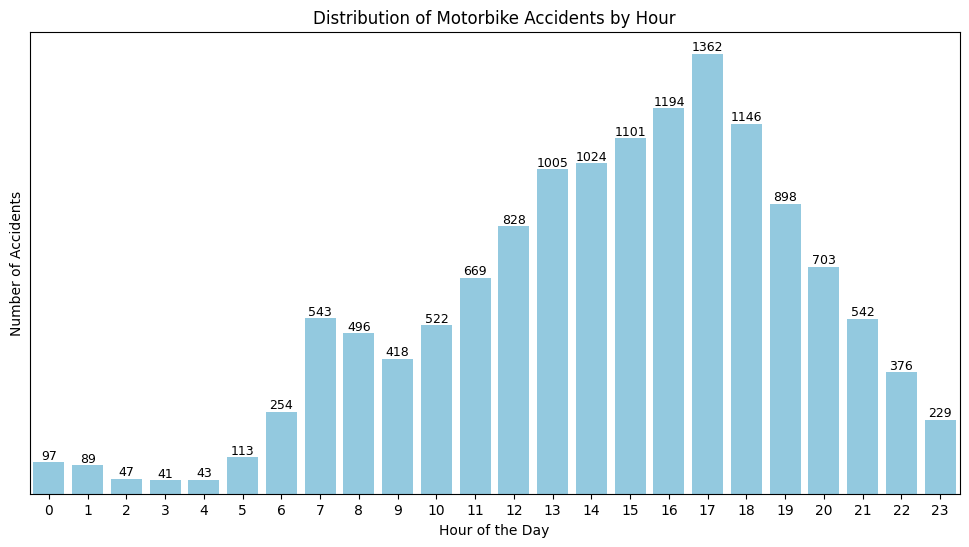

In [19]:
# Calling the function to plot the distribution of motorbike accidents by hour
countplot_distribution(motorbike_df, x_column='hour', color='skyblue', x_ticks=range(0, 24),
                        title='Distribution of Motorbike Accidents by Hour', x_label='Hour of the Day')

The countplot depicting motorcycle accidents exhibits a similar pattern to the trend previously observed in the distribution of overall accidents. It illustrates a consistent pattern where the number of accidents gradually increases starting from 5:00 AM and peaks at 5:00 PM (17:00 hrs) with 1,362 accidents. Following this peak, the accident count begins to decline until it reaches its lowest point around 4:00 AM, after which it starts to rise again.

The observed trend in the countplot could potentially be attributed to several underlying factors. The rise in accidents from 5:00 AM onwards might be correlated with the start of the morning rush hour, when commuters head out for work and traffic volumes increase, resulting in a higher likelihood of accidents. The peak at 5:00 PM aligns with the evening rush hour, another period of increased traffic activity as people return home from work. The declining trend in accidents from the evening peak until the early morning hours could reflect reduced traffic during nighttime, when fewer motorcycles are on the road.

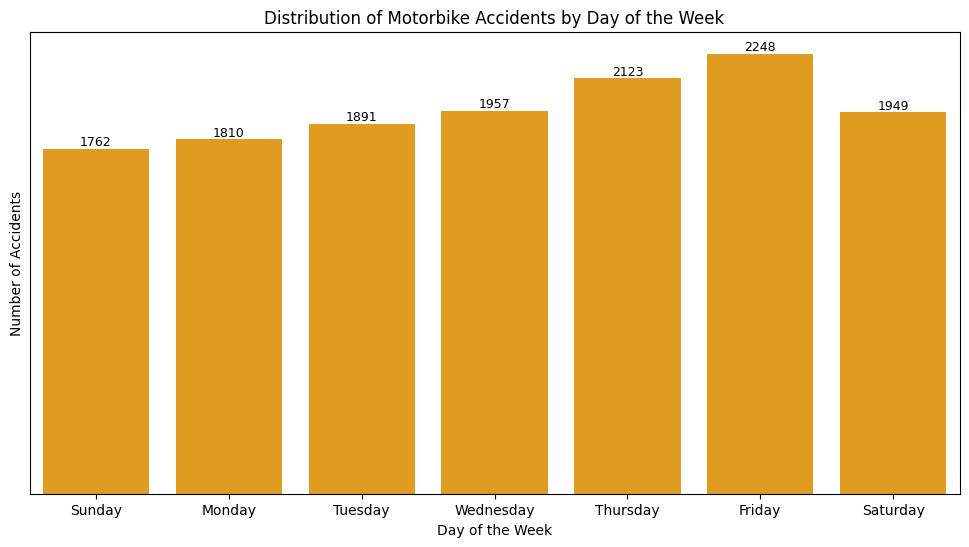

In [20]:
# Calling the function to plot the distribution of motorbike accidents by day of the week
countplot_distribution(motorbike_df, x_column='day_of_week', color='orange', x_ticks=range(7), 
                        x_tick_labels=days, title='Distribution of Motorbike Accidents by Day of the Week', 
                        x_label='Day of the Week')

The countplot depicting motorcycle accidents by day of the week exhibits a similar pattern to the trend previously observed in the distribution of overall accidents.

The day with the most accidents is Friday, having the highest count at 2,248. Thursday follows closely with a notable count of 2,123 accidents. Wednesday (1,957) and Tuesday (1,891) show slightly fewer accident counts but consistently display a pattern of increased accidents during the middle of the week. Monday (1,810) continues the trend of higher accidents at the beginning of the week. Saturday (1,949) has a lower accident count in comparison to weekdays. Sunday records the lowest count of accidents, with 1,762 occurrences.

In summary, the analysis of the accident countplot indicates a clear pattern of higher accident occurrences during weekdays, with Fridays and Thursdays showing the highest counts. The weekend, particularly Sunday, tends to have fewer accidents, likely due to reduced work-related travel and more leisure-oriented driving patterns. These insights can guide road safety measures and traffic management strategies, focusing on accident-prone days to minimize risks and enhance overall safety.

### 3. Hours of the Day and Days of the Week for Pedestrian Accidents:
For this task, our primary emphasis will be on extracting essential attributes from both the accident and casualty tables. These attributes encompass the accident index, time, casualty class, and the day of the week. As a pivotal step within the feature engineering procedure, we will generate the hour feature from the time attribute. Of particular relevance is the casualty class feature, as it details the various casualty classes involved in accidents.

Our analytical focus centers on the pedestrian class. This casualty class corresponds to code 3 in the STATS 20 document. Consequently, we will extract and visually represent accident data relevant to the pedestrian class. This approach will enable us to observe the distribution of pedestrian accidents based on both the hour of occurrence and the day of the week.

In [21]:
# Extracting relevant columns and merging the accident table with the casualty table
cur.execute("""
SELECT A.accident_index, A.time, A.day_of_week, C.casualty_class
FROM Accident A
JOIN Casualty C ON A.accident_index = C.accident_index
WHERE A.accident_year = 2020;
""")
accidentCasualty_data = cur.fetchall()

# Creating a pandas DataFrame to store the results
columns = ['accident_index', 'time', 'day_of_week', 'casualty_class']
accidentCasualty_df = pd.DataFrame(accidentCasualty_data, columns=columns)
accidentCasualty_df.head()

accident_index   time  day_of_week  casualty_class
0  2020010219808  09:00            3               3
1  2020010220496  13:55            2               3
2  2020010220496  13:55            2               3
3  2020010228005  01:25            4               3
4  2020010228006  01:50            4               3

In [22]:
# Filtering data for pedestrian accidents
pedestrian_df = accidentCasualty_df[accidentCasualty_df['casualty_class'] == 3].copy()
pedestrian_df['hour'] = pd.to_datetime(pedestrian_df['time'], format="%H:%M").dt.hour

# Displaying the dataframe
pedestrian_df

accident_index   time  day_of_week  casualty_class  hour
0       2020010219808  09:00            3               3     9
1       2020010220496  13:55            2               3    13
2       2020010220496  13:55            2               3    13
3       2020010228005  01:25            4               3     1
4       2020010228006  01:50            4               3     1
...               ...    ...          ...             ...   ...
115573  2020991023621  10:30            3               3    10
115574  2020991023880  17:00            2               3    17
115578  2020991024526  12:00            3               3    12
115580  2020991029573  15:05            6               3    15
115583  2020991032575  13:50            3               3    13

[14750 rows x 5 columns]

In [23]:
# Checking the value counts of accident index feature
pedestrian_df["accident_index"].value_counts()

accident_index
2020010266513    8
2020100966861    5
2020010234510    5
2020137C90269    4
2020200974011    4
                ..
202006P179189    1
202006P269860    1
202006P270350    1
202006P275388    1
2020991032575    1
Name: count, Length: 14193, dtype: int64

- The displayed outcome indicates the presence of replicated entries within the accident_index column of the merged table. This duplication arises due to the combination of data from the accident and casualty tables. Given our focus on pedestrian accidents rather than the tally of pedestrians engaged in each incident, the duplicated values will be eliminated. This action aims to ensure that the dataframe accurately represents the genuine count of pedestrian accidents, rather than the count of pedestrians associated with those accidents.

In [24]:
# Dropping the rows with duplicate 'accident_index'
pedestrian_df = pedestrian_df.drop_duplicates(subset='accident_index', keep='first')

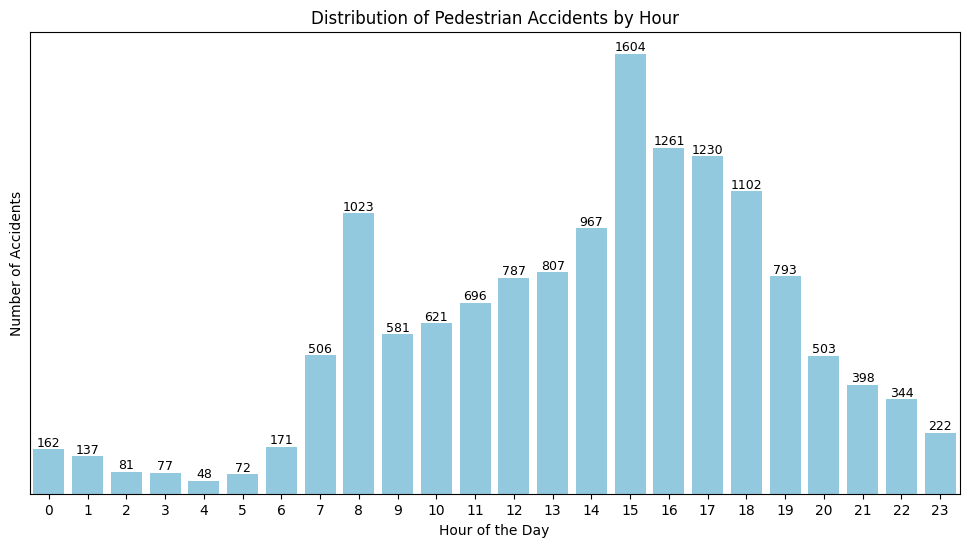

In [25]:
# Calling the function to plot the distribution of pedestrian accidents by hour
countplot_distribution(pedestrian_df, x_column='hour', color='skyblue', x_ticks=range(0, 24),
                        title='Distribution of Pedestrian Accidents by Hour', x_label='Hour of the Day')

- The countplot reveals that pedestrian accidents exhibit a distinct trend throughout the day. The pattern suggests that pedestrian accidents increase from 5:00 AM to 3:00 PM, peaking at 3:00 PM, followed by a gradual decline until 4:00 AM. The prominent peak at 3:00 PM implies that this time sees the highest occurrence of pedestrian accidents, possibly due to increased pedestrian activity during daylight hours. The relatively low accidents between 1:00 AM and 4:00 AM could be attributed to reduced pedestrian movement during these early morning hours.

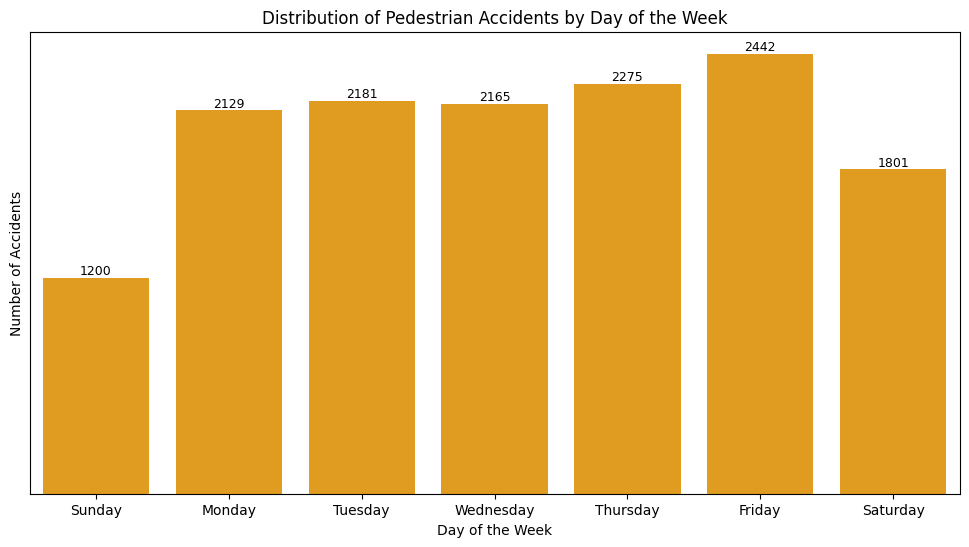

In [26]:
# Calling the function to plot the distribution of motorbike accidents by day of the week
countplot_distribution(pedestrian_df, x_column='day_of_week', color='orange', x_ticks=range(7), 
                        x_tick_labels=days, title='Distribution of Pedestrian Accidents by Day of the Week', 
                        x_label='Day of the Week')

The countplot depicting pedestrian accidents by day of the week exhibits a similar pattern to the trend previously observed in the distribution of overall accidents.

The analysis of pedestrian accidents based on days of the week unveils distinct patterns. Friday stands out with the highest count of pedestrian accidents, reaching 2,442 incidents. This peak could be attributed to heightened pedestrian activity during the weekend's onset. Thursday closely trails with 2,275 accidents, signifying a continued trend of elevated pedestrian accidents as the workweek progresses. Wednesday and Tuesday exhibit slightly lower accident counts (2,165 and 2,181 respectively), suggesting increased pedestrian involvement in the middle of the week. Monday's pedestrian accidents (2,129) align with the overall pattern of higher accidents at the start of the week, possibly due to heightened commuter movement. Saturday experiences fewer pedestrian accidents (1,801), indicative of reduced weekday work-related traffic. Sunday records the lowest pedestrian accident count (1,200), likely due to minimal activity and reduced pedestrian presence on weekends.

### 4. Apriori algorithm: Impact of selected variables on accident severity
Our focus is to extract key attributes from accidents, including weather conditions, speed limit, light conditions, and accident severity. We aim to assess the impact of these variables on accident severity using the Apriori algorithm. After one-hot encoding each variable, they will be combined and processed through the Apriori algorithm to establish association rules.

In [27]:
# Extracting relevant columns
cur.execute("""
SELECT A.weather_conditions, A.speed_limit, A.light_conditions, A.accident_severity
FROM Accident A
WHERE A.accident_year = 2020;
""")
apriori_data = cur.fetchall()

# Creating a pandas DataFrame to store the results
columns = ['weather_conditions', 'speed_limit', 'light_conditions', 'accident_severity']
apriori_df = pd.DataFrame(apriori_data, columns=columns)
apriori_df.head()

weather_conditions  speed_limit  light_conditions  accident_severity
0                   9           20                 1                  3
1                   1           20                 1                  3
2                   1           30                 4                  3
3                   1           30                 4                  2
4                   1           30                 4                  3

In [28]:
# One-hot encoding for the accident_severity feature
a_severity = pd.get_dummies(apriori_df.accident_severity, prefix = 'severity')
a_severity

severity_1  severity_2  severity_3
0           False       False        True
1           False       False        True
2           False       False        True
3           False        True       False
4           False       False        True
...           ...         ...         ...
91194       False        True       False
91195       False       False        True
91196       False        True       False
91197       False       False        True
91198       False       False        True

[91199 rows x 3 columns]

In [29]:
# One-hot encoding for the weather_conditions feature
weather_con = pd.get_dummies(apriori_df.weather_conditions, prefix = 'weather')
weather_con

weather_-1  weather_1  weather_2  weather_3  weather_4  weather_5  \
0           False      False      False      False      False      False   
1           False       True      False      False      False      False   
2           False       True      False      False      False      False   
3           False       True      False      False      False      False   
4           False       True      False      False      False      False   
...           ...        ...        ...        ...        ...        ...   
91194       False       True      False      False      False      False   
91195       False       True      False      False      False      False   
91196       False       True      False      False      False      False   
91197       False       True      False      False      False      False   
91198       False       True      False      False      False      False   

       weather_6  weather_7  weather_8  weather_9  
0          False      False      False       True  
1          False      False      False      False  
2          False      False      False      False  
3          False      False      False      False  
4          False      False      False      False  
...          ...        ...        ...        ...  
91194      False      False      False      False  
91195      False      False      False      False  
91196      False      False      False      False  
91197      False      False      False      False  
91198      False      False      False      False  

[91199 rows x 10 columns]

In [30]:
# One-hot encoding for the speed_limit feature
speed_limit = pd.get_dummies(apriori_df.speed_limit, prefix = 'speed')
speed_limit

speed_-1  speed_20  speed_30  speed_40  speed_50  speed_60  speed_70
0         False      True     False     False     False     False     False
1         False      True     False     False     False     False     False
2         False     False      True     False     False     False     False
3         False     False      True     False     False     False     False
4         False     False      True     False     False     False     False
...         ...       ...       ...       ...       ...       ...       ...
91194     False     False      True     False     False     False     False
91195     False     False      True     False     False     False     False
91196     False     False     False     False     False      True     False
91197     False     False      True     False     False     False     False
91198     False     False      True     False     False     False     False

[91199 rows x 7 columns]

In [31]:
# Concatenating the dataframes along the columns
combined_df = pd.concat([a_severity, weather_con, speed_limit], axis=1)
combined_df

severity_1  severity_2  severity_3  weather_-1  weather_1  weather_2  \
0           False       False        True       False      False      False   
1           False       False        True       False       True      False   
2           False       False        True       False       True      False   
3           False        True       False       False       True      False   
4           False       False        True       False       True      False   
...           ...         ...         ...         ...        ...        ...   
91194       False        True       False       False       True      False   
91195       False       False        True       False       True      False   
91196       False        True       False       False       True      False   
91197       False       False        True       False       True      False   
91198       False       False        True       False       True      False   

       weather_3  weather_4  weather_5  weather_6  weather_7  weather_8  \
0          False      False      False      False      False      False   
1          False      False      False      False      False      False   
2          False      False      False      False      False      False   
3          False      False      False      False      False      False   
4          False      False      False      False      False      False   
...          ...        ...        ...        ...        ...        ...   
91194      False      False      False      False      False      False   
91195      False      False      False      False      False      False   
91196      False      False      False      False      False      False   
91197      False      False      False      False      False      False   
91198      False      False      False      False      False      False   

       weather_9  speed_-1  speed_20  speed_30  speed_40  speed_50  speed_60  \
0           True     False      True     False     False     False     False   
1          False     False      True     False     False     False     False   
2          False     False     False      True     False     False     False   
3          False     False     False      True     False     False     False   
4          False     False     False      True     False     False     False   
...          ...       ...       ...       ...       ...       ...       ...   
91194      False     False     False      True     False     False     False   
91195      False     False     False      True     False     False     False   
91196      False     False     False     False     False     False      True   
91197      False     False     False      True     False     False     False   
91198      False     False     False      True     False     False     False   

       speed_70  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
91194     False  
91195     False  
91196     False  
91197     False  
91198     False  

[91199 rows x 20 columns]

In [32]:
# Running Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(combined_df, min_support=0.2, use_colnames=True)

In [33]:
# Running association rules to find patterns
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Displaying the rules
rules

antecedents              consequents  antecedent support  \
0               (weather_1)             (severity_3)            0.775546   
1              (severity_3)              (weather_1)            0.783484   
2                (speed_30)             (severity_3)            0.573033   
3              (severity_3)               (speed_30)            0.783484   
4               (weather_1)               (speed_30)            0.775546   
5                (speed_30)              (weather_1)            0.573033   
6     (weather_1, speed_30)             (severity_3)            0.450137   
7   (weather_1, severity_3)               (speed_30)            0.603186   
8    (speed_30, severity_3)              (weather_1)            0.459983   
9               (weather_1)   (speed_30, severity_3)            0.775546   
10               (speed_30)  (weather_1, severity_3)            0.573033   
11             (severity_3)    (weather_1, speed_30)            0.783484   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.783484  0.603186    0.777757  0.992690 -0.004442    0.974230   
1             0.775546  0.603186    0.769877  0.992690 -0.004442    0.975365   
2             0.783484  0.459983    0.802717  1.024548  0.011021    1.097488   
3             0.573033  0.459983    0.587099  1.024548  0.011021    1.034068   
4             0.573033  0.450137    0.580413  1.012879  0.005723    1.017589   
5             0.775546  0.450137    0.785534  1.012879  0.005723    1.046572   
6             0.783484  0.359697    0.799084  1.019911  0.007022    1.077643   
7             0.573033  0.359697    0.596328  1.040653  0.014051    1.057709   
8             0.775546  0.359697    0.781979  1.008294  0.002959    1.029505   
9             0.459983  0.359697    0.463798  1.008294  0.002959    1.007115   
10            0.603186  0.359697    0.627708  1.040653  0.014051    1.065865   
11            0.450137  0.359697    0.459099  1.019911  0.007022    1.016570   

    zhangs_metric  
0       -0.031765  
1       -0.032891  
2        0.056116  
3        0.110660  
4        0.056649  
5        0.029780  
6        0.035503  
7        0.098446  
8        0.015233  
9        0.036650  
10       0.091493  
11       0.090164

From the rules of associations above, the following are the insights drawn from it:

1.	weather_1 (Antecdent) vs severity_3 (consequent): This suggests that accidents with weather condition "weather_1" (Fine no high winds weather) are associated with slight accident severity (severity_3). The result also suggests that accidents under clear weather conditions are likely to result in slight accident severity due to the high confidence points of 0.777757.

2.	speed_30 (antecedent) vs severity_3 (consequent): This suggests that accidents with a speed limit of 30 are associated with slight accident severity (severity_3). It also suggests that accidents occurring at this speed are more likely to result in slight outcomes due to the high confidence points of 0.802717.

3.	speed_30, weather_1 (antecedent) severity_3 (consequent): This is a combination of the effects of both speed limit and weather condition on accident severity. It could be deduced that accidents with a speed limit of 30 under clear weather conditions are associated with slight accident severity (severity_3). This also suggests that accidents under these conditions are more likely to result in slight outcomes due to the high confidence points of 0.799084.


### 5. Clustering: Identifying accidents in Kingston upon Hull, Humberside, East Riding of Yorkshire etc.
For this task, the first step will be to extract essential attributes from both the accident and lsoa tables. These attributes encompass the accident index, longitude, latitude, police force and lsoa01nm.

In [34]:
# Execute the SQL query to retrieve accident data
cur.execute("""
SELECT A.accident_index, A.longitude, A.latitude, A.police_force, L.lsoa01nm
FROM Accident A
JOIN LSOA L ON A.lsoa_of_accident_location = L.lsoa01cd 
WHERE A.police_force = 16 AND A.accident_year = 2020;
""")
accidents_data = cur.fetchall()

In [35]:
# Creating a pandas DataFrame to store the results
columns = ['accident_index', 'longitude', 'latitude', 'police_force', 'lsoa01nm']
clustering_df = pd.DataFrame(accidents_data, columns=columns)

- The "lsoa01nm" feature was included in the dataframe to facilitate the analysis of clusters based on regions.

In [36]:
# Checking the length of the datapoints in the dataframe 
len(clustering_df)

1663

- There are 1663 datapoints in the dataframe

In [37]:
# Displaying the dataframe
clustering_df.head()

accident_index  longitude   latitude  police_force  \
0  2020160914930  -0.393424  53.744936            16   
1  2020160915008  -0.528743  53.512895            16   
2  2020160915028  -0.324858  53.791630            16   
3  2020160915041  -0.095008  53.574501            16   
4  2020160915047  -0.327733  53.767805            16   

                       lsoa01nm  
0       Kingston upon Hull 028E  
1       North Lincolnshire 022C  
2       Kingston upon Hull 002E  
3  North East Lincolnshire 003C  
4       Kingston upon Hull 016D

### Selection of number of clusters using Elbow Method
Given that the absence of values in the longitude and latitude attributes within the dataframe is not expected to significantly affect the clustering analysis, these missing values will be omitted temporarily. However, they will be addressed subsequently in the section dedicated to outlier detection within this assessment.

In [38]:
# Dropping the missing values in the longitude and latitude features
clustering_df.dropna(subset=['longitude', 'latitude'], inplace=True)

In [39]:
# Selecting the features for the clustering
coordinates = clustering_df[['latitude', 'longitude']]

In [40]:
# Using Elbow Method to select the best cluster number
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, n_init = 10)
    y_means = model.fit_predict(coordinates)
    wcss.append(model.inertia_)

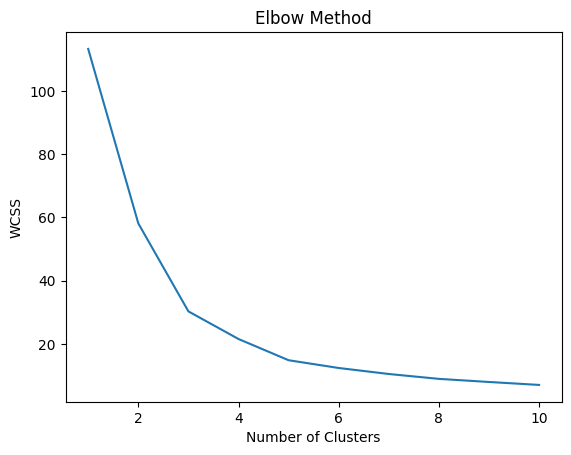

In [41]:
# Visualising the Elbow Method
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

- From the elbow method above, 5 is considered to be the most suitable number of clusters to be used for the clustering analysis.

### Clustering Analysis

In [42]:
# Clustering using KMeans
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, n_init = 10, random_state=42)
clustering_df['cluster'] = kmeans.fit_predict(coordinates)

In [43]:
# Converting the cluster values to list
cluster1 = clustering_df[['latitude', 'longitude']][clustering_df['cluster'] == 0].values.tolist()
cluster2 = clustering_df[['latitude', 'longitude']][clustering_df['cluster'] == 1].values.tolist()
cluster3 = clustering_df[['latitude', 'longitude']][clustering_df['cluster'] == 2].values.tolist()
cluster4 = clustering_df[['latitude', 'longitude']][clustering_df['cluster'] == 3].values.tolist()
cluster5 = clustering_df[['latitude', 'longitude']][clustering_df['cluster'] == 4].values.tolist()

In [44]:
# Analyzing the clusters
cluster_counts = clustering_df['cluster'].value_counts()
print("Number of accidents in each cluster:")
print(cluster_counts)

Number of accidents in each cluster:
cluster
0    831
1    333
3    261
2    128
4    110
Name: count, dtype: int64


In [45]:
def analyze_cluster_regions(clustering_df):
    cluster_counts = {}

    for cluster_num in range(5):
        cluster = clustering_df[clustering_df["cluster"]==cluster_num]
        cluster_counts[cluster_num] = {
            "East Riding of Yorkshire": len(cluster[cluster["lsoa01nm"].str.startswith("East Riding of Yorkshire")]),
            "Kingston upon Hull": len(cluster[cluster["lsoa01nm"].str.startswith("Kingston upon Hull")]),
            "North East Lincolnshire": len(cluster[cluster["lsoa01nm"].str.startswith("North East Lincolnshire")]),
            "North Lincolnshire": len(cluster[cluster["lsoa01nm"].str.startswith("North Lincolnshire")])
        }
    
    for cluster_num, region_counts in cluster_counts.items():
        print(f"Cluster {cluster_num}:")
        for region, count in region_counts.items():
            print(f"{region}: {count}")
        print("-----------------------------------------------------------------------------------")

print("The value counts of regions across the 5 clusters:")
print("-----------------------------------------------------------------------------------")

# Call the function with your clustering_df dataframe
analyze_cluster_regions(clustering_df)

The value counts of regions across the 5 clusters:
-----------------------------------------------------------------------------------
Cluster 0:
East Riding of Yorkshire: 196
Kingston upon Hull: 569
North East Lincolnshire: 3
North Lincolnshire: 63
-----------------------------------------------------------------------------------
Cluster 1:
East Riding of Yorkshire: 31
Kingston upon Hull: 0
North East Lincolnshire: 299
North Lincolnshire: 3
-----------------------------------------------------------------------------------
Cluster 2:
East Riding of Yorkshire: 128
Kingston upon Hull: 0
North East Lincolnshire: 0
North Lincolnshire: 0
-----------------------------------------------------------------------------------
Cluster 3:
East Riding of Yorkshire: 23
Kingston upon Hull: 0
North East Lincolnshire: 0
North Lincolnshire: 238
-----------------------------------------------------------------------------------
Cluster 4:
East Riding of Yorkshire: 110
Kingston upon Hull: 0
North East Li

- The outcome presented demonstrates that only cluster 2 and cluster 4 exhibit a distinct purity, comprising data points solely from the East Riding of Yorkshire. Conversely, the remaining clusters share their data points across the four regions within the Humberside area. It's additionally evident that each region prominently features in at least one cluster, underscoring the clusters' informative and insightful nature. The forthcoming visualizations will provide a more comprehensive illustration of the composition of these clusters.

In [46]:
# Calculating the average latitude and longitude
average_latitude = clustering_df['latitude'].mean()
average_longitude = clustering_df['longitude'].mean()

# Creating a map centered around the average coordinates
map_center = [average_latitude, average_longitude]

In [47]:
# Displaying the map center
map = folium.Map(location=map_center, zoom_start = 10, tiles = "openstreetmap")
map

In [48]:
# Adding circle markers for each cluster
for i in cluster1:
    folium.CircleMarker(i, radius=2, color="blue", fill_color="lightblue").add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2, color="red", fill_color="lightred").add_to(map)

for i in cluster3:
    folium.CircleMarker(i, radius=2, color="green", fill_color="lightgreen").add_to(map)

for i in cluster4:
    folium.CircleMarker(i, radius=2, color="brown", fill_color="lightbrown").add_to(map)

for i in cluster5:
    folium.CircleMarker(i, radius=2, color="grey", fill_color="lightgrey").add_to(map)

In [49]:
# Visualising the clusters on the Map
map

- From the map above, the major clusters formed are as follows:

Red Cluster: This shows that majority of the accidents within this cluster took place at Grimsby. However, there are notable pockets of accidents across Immingham and Withernsea as well.
1. Grimsby (North East Lincolnshire) - Major
2. Immingham (North East Lincolnshire) - Minor
3. Withernsea (East Riding of Yorkshire) - Minor

Brown Cluster: This shows that majority of the accidents within this cluster took place at Scunthorpe. However, there are notable pockets of accidents across Brigg, Epworth, South Cave, Crowle and Kirton in Lindsey as well.
1. Scunthorpe (North Lincolnshire) - Major
2. Brigg (North Lincolnshire) - Minor
3. Epworth (North Lincolnshire) - Minor
4. South Cave (East Riding of Yorkshire) - Minor
5. Crowle (North Lincolnshire) - Minor
6. Kirton in Lindsey (North Lincolnshire) - Minor

Blue Cluster: This shows that majority of the accidents within this cluster took place at Hull. However, there are notable pockets of accidents at Beverly, Barton-upon-Humber and Hedon as well.
1. Hull (Kingston Upon Hull) - Major
2. Beverly (East Riding of Yorkshire) - Minor
3. Barton-upon-Humber (North Lincolnshire) - Minor
4. Hedon (East Riding of Yorkshire) - Minor

Green Cluster: This shows that majority of the accidents within this cluster took place at Goole. However, there are notable pockets of accidents at Pocklington and Howden as well. It's also clear that all the accidents within this cluster are within the East Riding of Yorkshire.
1. Goole (East Riding of Yorkshire) - Major
2. Pocklington (East Riding of Yorkshire) - Minor
3. Howden (East Riding of Yorkshire) - Minor

Grey Cluster: This shows that majority of the accidents within this cluster took place at Bridlington. However, there are notable pockets of accidents at Driffield and Hornsea as well. It's also clear that all the accidents within this cluster are within the East Riding of Yorkshire.
1. Bridlington (East Riding of Yorkshire) - Major
2. Driffield (East Riding of Yorkshire) - Minor
3. Hornsea (East Riding of Yorkshire) - Minor

In [50]:
# Creating a Folium map centered around the region
map_center = [clustering_df['latitude'].mean(), clustering_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10, tiles='CartoDB positron')

# Using MarkerCluster to group markers for performance
marker_cluster = MarkerCluster().add_to(m)

# Adding markers for each accident, color-coded by cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']
for _, row in clustering_df.iterrows():
    folium.Marker(
        location=(row['latitude'], row['longitude']),
        icon=folium.Icon(color=colors[row['cluster']], icon_size=(10, 10)),
        popup=row['accident_index'],
    ).add_to(marker_cluster)

# Displaying the map in the Jupyter Notebook
display(m)

### 6. Outlier Detection: Identifying unusual entries in the data set

In [51]:
# Querying out the accident data for 2020
accident_query = 'SELECT * FROM accident WHERE accident_year = 2020'

# Creating a dataframe for the vehicle table
accident_df = pd.read_sql_query(accident_query, con)
accident_df

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [52]:
# Querying out the vehicle data for 2020
vehicle_query = 'SELECT * FROM vehicle WHERE accident_year = 2020'

# Creating a dataframe for the vehicle table
vehicle_df = pd.read_sql_query(vehicle_query, con)
vehicle_df

vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


In [53]:
# Querying out the casualty data for 2020
casualty_query = 'SELECT * FROM casualty WHERE accident_year = 2020'

# Creating a dataframe for the vehicle table
casualty_df = pd.read_sql_query(casualty_query, con)
casualty_df

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

- The presented tables make it apparent that a significant portion of the features are encoded rather than continuous. Consequently, the focus of outlier detection will be solely on pertinent continuous attributes. Notably, this includes the longitude and latitude in the accident table, along with the age of driver and age of vehicle in the vehicle table.

### Age of Vehicle Distribution

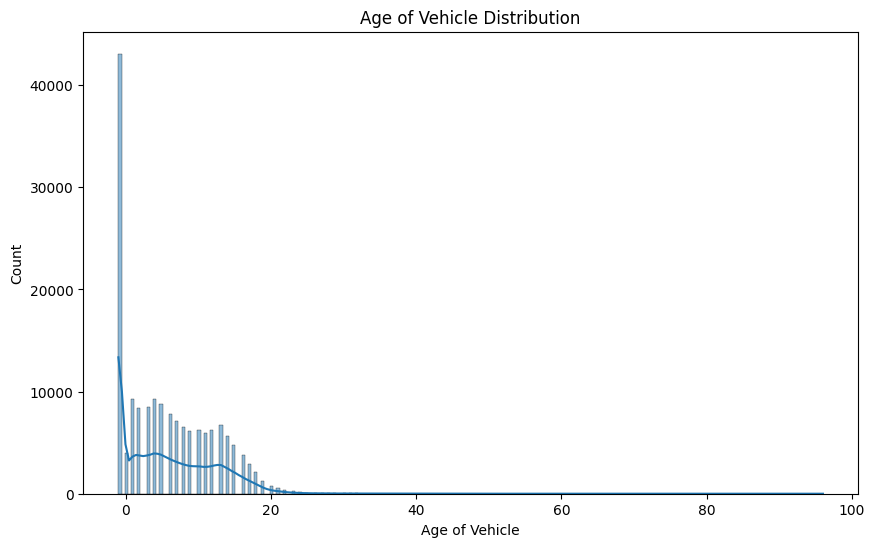

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(x = vehicle_df["age_of_vehicle"], data = vehicle_df, kde = True);
# Setting plot title and axis labels
plt.title("Age of Vehicle Distribution")
plt.xlabel("Age of Vehicle")

# Displaying the plot
plt.show()

- The histogram plot highlights the presence of outliers within the age of vehicle distribution. This observation warrants a deeper investigation as part of the analysis process.

### Age of Driver Distribution

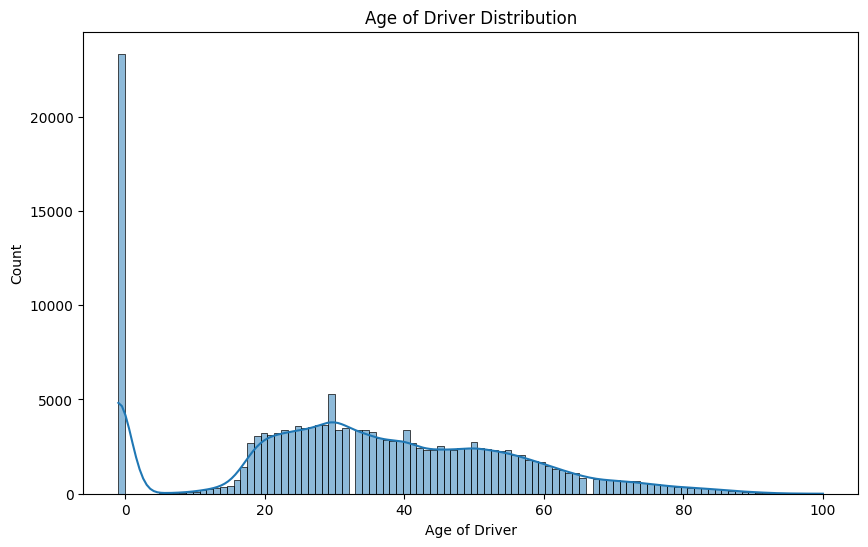

In [55]:
plt.figure(figsize=(10,6))
sns.histplot(x = vehicle_df["age_of_driver"], data = vehicle_df, kde = True);
# Setting plot title and axis labels
plt.title("Age of Driver Distribution")
plt.xlabel("Age of Driver")

# Displaying the plot
plt.show()

- The histogram plot highlights the presence of outliers within the age of driver distribution. This observation warrants a deeper investigation as part of the analysis process.

### Outlier Detection in the Vehicle Table
In the cells below, the IQR Test and the Grubbs' Test will be conducted to detect outliers in the vehicle table.

### Multiple IQR Test for "Age of Vehicle" and "Age of Driver" in the vehicle dataframe

In [56]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr_range = q3 - q1
    lower_bound = q1 - 1.5 * iqr_range
    upper_bound = q3 + 1.5 * iqr_range
    print1 = print("lower_bound:", lower_bound)
    print2 = print("lower_bound:", upper_bound)
    return (column < lower_bound) | (column > upper_bound)
    return print1
    return print2

### Outliers in the age_of_driver feature in the Vehicle Dataframe

In [57]:
# Create DataFrames to store outliers detected using IQR method
outliers_iqr_age_of_driver = vehicle_df[detect_outliers_iqr(vehicle_df['age_of_driver'])]

print("Outliers detected using IQR method for 'age_of_driver':")
outliers_iqr_age_of_driver

lower_bound: -18.5
lower_bound: 89.5
Outliers detected using IQR method for 'age_of_driver':


vehicle_index accident_index  accident_year accident_reference  \
1802           683518  2020010231441           2020          010231441   
2071           683787  2020010231896           2020          010231896   
2463           684179  2020010232619           2020          010232619   
2646           684362  2020010232979           2020          010232979   
3030           684746  2020010233661           2020          010233661   
...               ...            ...            ...                ...   
164223         845939  2020990969062           2020          990969062   
164561         846277  2020990972908           2020          990972908   
165071         846787  2020990978759           2020          990978759   
165970         847686  2020990991630           2020          990991630   
166819         848535  2020991004453           2020          991004453   

        vehicle_reference  vehicle_type  towing_and_articulation  \
1802                    2             9                        0   
2071                    1             9                        0   
2463                    1             9                        0   
2646                    1             9                        0   
3030                    1             9                        0   
...                   ...           ...                      ...   
164223                  1             9                        0   
164561                  1             9                        0   
165071                  1             9                        0   
165970                  1            19                        0   
166819                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
1802                   18                       3                     7  ...   
2071                    5                       5                     1  ...   
2463                   18                       2                     6  ...   
2646                    9                       5                     3  ...   
3030                   99                       9                     9  ...   
...                   ...                     ...                   ...  ...   
164223                 18                       6                     2  ...   
164561                  9                       6                     2  ...   
165071                  4                       5                     8  ...   
165970                  2                       0                     0  ...   
166819                 18                       5                     1  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
1802                            6              1             90   
2071                            6              1             91   
2463                            6              1             90   
2646                            6              1             91   
3030                            6              3             93   
...                           ...            ...            ...   
164223                          5              1             90   
164561                          5              1             96   
165071                          6              1             92   
165970                          6              1             90   
166819                          5              1             91   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
1802                    11                1388                1   
2071                    11                1596                1   
2463                    11                1998                1   
2646                    11                1591                1   
3030                    11                1389                1   
...                    ...                 ...              ...   
164223                  11                1598                2   


In [58]:
# Displaying the unique values in the outliers
print("The unique values of the outliers in the age of driver identified by the IQR Test:")
np.sort(outliers_iqr_age_of_driver["age_of_driver"].unique())

The unique values of the outliers in the age of driver identified by the IQR Test:


array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

### Outliers in the age_of_vehicle feature in the Vehicle Dataframe

In [59]:
# Create DataFrames to store outliers detected using IQR method
outliers_iqr_age_of_vehicle = vehicle_df[detect_outliers_iqr(vehicle_df['age_of_vehicle'])]

print("Outliers detected using IQR method for 'age_of_vehicle':")
outliers_iqr_age_of_vehicle

lower_bound: -19.0
lower_bound: 29.0
Outliers detected using IQR method for 'age_of_vehicle':


vehicle_index accident_index  accident_year accident_reference  \
847            682563  2020010229701           2020          010229701   
1822           683538  2020010231465           2020          010231465   
3450           685166  2020010234271           2020          010234271   
3884           685600  2020010234969           2020          010234969   
5090           686806  2020010237020           2020          010237020   
...               ...            ...            ...                ...   
165468         847184  2020990984616           2020          990984616   
165498         847214  2020990984765           2020          990984765   
166020         847736  2020990992686           2020          990992686   
166180         847896  2020990994835           2020          990994835   
166704         848420  2020991002465           2020          991002465   

        vehicle_reference  vehicle_type  towing_and_articulation  \
847                     1             9                        0   
1822                    2            90                        0   
3450                    2             9                        0   
3884                    1             4                        0   
5090                    1             5                        0   
...                   ...           ...                      ...   
165468                  1             9                        0   
165498                  1             3                        0   
166020                  2            17                        0   
166180                  1             9                        0   
166704                  2            90                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
847                    99                       9                     9  ...   
1822                   18                       7                     3  ...   
3450                    5                       5                     1  ...   
3884                   18                       1                     5  ...   
5090                   18                       4                     8  ...   
...                   ...                     ...                   ...  ...   
165468                 16                       6                     2  ...   
165498                  4                       4                     8  ...   
166020                 10                       1                     5  ...   
166180                  2                       0                     0  ...   
166704                 18                       5                     1  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
847                             6              1             45   
1822                            6              1             -1   
3450                            6              1             51   
3884                            6              1             25   
5090                            2              1             23   
...                           ...            ...            ...   
165468                          5              1             74   
165498                          6              1             27   
166020                          1              1             57   
166180                          5              1             23   
166704                          5              1             53   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
847                      7                1108                1   
1822                    -1                1971                1   
3450                     8                2299                1   
3884                     5                 400                1   
5090                     5                 500                1   
...                    ...                 ...              ...   
165468                  10                3781                1   


In [60]:
# Displaying the unique values in the outliers
print("The unique values of the outliers in the age of vehicle identified by the IQR Test:")
np.sort(outliers_iqr_age_of_vehicle["age_of_vehicle"].unique())

The unique values of the outliers in the age of vehicle identified by the IQR Test:


array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64,
       66, 67, 68, 78, 84, 86, 88, 92, 93, 96], dtype=int64)

- The data analysis reveals the presence of 324 data points identified as outliers through IQR Test. The distinct attributes of these outliers raise the likelihood of their authenticity. Notably, instances where vehicle age is reported as 30 and above might be correct, considering the typical lifespan of vehicles in the United Kingdom. Given their limited number, it's feasible to contemplate excluding these outliers from the vehicle dataframe, as their removal is unlikely to significantly influence our analysis.

### Grubbs' Test

In [61]:
# Assuming you have a DataFrame named 'vehicle_df'
a_age_of_driver = vehicle_df["age_of_driver"]
a_age_of_vehicle = vehicle_df["age_of_vehicle"]

# Compute the mean and standard deviation for both features
avg_age_of_driver = np.mean(a_age_of_driver)
avg_age_of_vehicle = np.mean(a_age_of_vehicle)
stdev_age_of_driver = np.std(a_age_of_driver)
stdev_age_of_vehicle = np.std(a_age_of_vehicle)

# Compute the absolute value of x(i) - avg(x)
absvalues_age_of_driver = abs(a_age_of_driver - avg_age_of_driver)
absvalues_age_of_vehicle = abs(a_age_of_vehicle - avg_age_of_vehicle)

# Obtain the maximum value of the absvalues
maxvalue_age_of_driver = max(absvalues_age_of_driver)
maxvalue_age_of_vehicle = max(absvalues_age_of_vehicle)

# Compute the G value from the above
Grubbs_age_of_driver = maxvalue_age_of_driver / stdev_age_of_driver
Grubbs_age_of_vehicle = maxvalue_age_of_vehicle / stdev_age_of_vehicle

print("Grubbs value for age_of_driver:", Grubbs_age_of_driver)
print("Grubbs value for age_of_vehicle:", Grubbs_age_of_vehicle)

# Compute the critical value of G needed to accept or reject H0
def get_critical_G(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

# Determining the critical parameter for the data
Gcritical_age_of_driver = get_critical_G(len(a_age_of_driver), 0.05)
Gcritical_age_of_vehicle = get_critical_G(len(a_age_of_vehicle), 0.05)

# Detect outliers using the Grubbs test and create boolean masks
outliers_mask_age_of_driver = abs(a_age_of_driver - avg_age_of_driver) > Gcritical_age_of_driver * stdev_age_of_driver
outliers_mask_age_of_vehicle = abs(a_age_of_vehicle - avg_age_of_vehicle) > Gcritical_age_of_vehicle * stdev_age_of_vehicle

# Filter the DataFrame to get outliers for both features
outliers_df_age_of_driver = vehicle_df[outliers_mask_age_of_driver]
outliers_df_age_of_vehicle = vehicle_df[outliers_mask_age_of_vehicle]

Grubbs value for age_of_driver: 3.14895940018594
Grubbs value for age_of_vehicle: 14.242053069432727
Grubbs Critical Value: 5.124052908584172
Grubbs Critical Value: 5.124052908584172


Interpretation:

- For the "age_of_driver" feature: Since the Grubbs value (3.14895940018594) is less than the Grubbs Critical Value (5.124052908584172), this suggests that the most extreme value in the "age_of_driver" data is not significantly deviating from the mean and is not considered an outlier based on the Grubbs test.

- For the "age_of_vehicle" feature: The Grubbs value (14.242053069432727) is much greater than the Grubbs Critical Value (5.124052908584172). This indicates that the most extreme value in the "age_of_vehicle" data is significantly deviating from the mean and could be considered an outlier based on the Grubbs test.

In [62]:
# Display the DataFrames containing outliers for the Age of Driver feature
print("Outliers in age_of_driver:")
outliers_df_age_of_driver

Outliers in age_of_driver:


Empty DataFrame
Columns: [vehicle_index, accident_index, accident_year, accident_reference, vehicle_reference, vehicle_type, towing_and_articulation, vehicle_manoeuvre, vehicle_direction_from, vehicle_direction_to, vehicle_location_restricted_lane, junction_location, skidding_and_overturning, hit_object_in_carriageway, vehicle_leaving_carriageway, hit_object_off_carriageway, first_point_of_impact, vehicle_left_hand_drive, journey_purpose_of_driver, sex_of_driver, age_of_driver, age_band_of_driver, engine_capacity_cc, propulsion_code, age_of_vehicle, generic_make_model, driver_imd_decile, driver_home_area_type]
Index: []

[0 rows x 28 columns]

In [63]:
# Display the DataFrames containing outliers for the Age of Vehicle feature
print("Outliers in age_of_vehicle:")
outliers_df_age_of_vehicle

Outliers in age_of_vehicle:


vehicle_index accident_index  accident_year accident_reference  \
6761           688477  2020010239861           2020          010239861   
8172           689888  2020010242272           2020          010242272   
8506           690222  2020010242873           2020          010242873   
11135          692851  2020010247246           2020          010247246   
12089          693805  2020010248649           2020          010248649   
...               ...            ...            ...                ...   
160606         842322  202063D044220           2020          63D044220   
163096         844812  2020990954167           2020          990954167   
165209         846925  2020990980802           2020          990980802   
165289         847005  2020990982344           2020          990982344   
165468         847184  2020990984616           2020          990984616   

        vehicle_reference  vehicle_type  towing_and_articulation  \
6761                    2             9                        0   
8172                    1             9                        0   
8506                    1             3                        0   
11135                   1             9                        0   
12089                   2             3                        0   
...                   ...           ...                      ...   
160606                  1             4                        0   
163096                  1             5                        0   
165209                  1             5                        5   
165289                  2             5                        0   
165468                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
6761                   99                       9                     9  ...   
8172                    1                       1                     5  ...   
8506                   99                       9                     9  ...   
11135                   9                       6                     5  ...   
12089                  18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
160606                 18                       3                     6  ...   
163096                 16                       6                     1  ...   
165209                 18                       6                     2  ...   
165289                 18                       3                     7  ...   
165468                 16                       6                     2  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
6761                            6              3             58   
8172                            6              1             44   
8506                            6              1             42   
11135                           6              1             61   
12089                           6              1             56   
...                           ...            ...            ...   
160606                          6              1             73   
163096                          5              1             68   
165209                          5              1             62   
165289                          5              1             66   
165468                          5              1             74   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
6761                     9                2050                2   
8172                     7                1117                1   
8506                     7                 125                1   
11135                    9                2926                1   
12089                    9                 125                1   
...                    ...                 ...              ...   
160606                  10                 500                1   


In [64]:
# Checking the unique values of the outliers
print("The unique values of the outliers in the age of vehicle identified by the Grubbs' Test:")
np.sort(outliers_df_age_of_vehicle["age_of_vehicle"].unique())

The unique values of the outliers in the age of vehicle identified by the Grubbs' Test:


array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 60, 61, 62, 63, 64, 66, 67, 68, 78, 84, 86, 88, 92, 93,
       96], dtype=int64)

- The data analysis reveals the presence of 138 data points identified as outliers through Grubbs' Test. The distinct attributes of these outliers raise the likelihood of their authenticity. Notably, instances where vehicle age is reported as 39 and above might be correct, considering the typical lifespan of vehicles in the United Kingdom. Given their limited number, it's feasible to contemplate excluding these outliers from the vehicle dataframe, as their removal is unlikely to significantly influence our analysis.

### Outlier Detection in the Accident Table

In [65]:
# Checking the missing values in the accident dataframe:
accident_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [66]:
# Inspecting the missing values in the longitude and latitude
accident_df[accident_df["longitude"].isnull()]

accident_index  accident_year accident_reference  location_easting_osgr  \
25520  2020052002442           2020          052002442                    NaN   
29452  2020070769852           2020          070769852                    NaN   
32689  2020122001194           2020          122001194                    NaN   
33578  2020137330369           2020          137330369                    NaN   
81252  2020522005114           2020          522005114                    NaN   
86437  2020622001016           2020          622001016                    NaN   
86642  202063A017520           2020          63A017520                    NaN   
86651  202063A018920           2020          63A018920                    NaN   
86668  202063A025020           2020          63A025020                    NaN   
86705  202063A035620           2020          63A035620                    NaN   
86785  202063A059120           2020          63A059120                    NaN   
87018  202063C020320           2020          63C020320                    NaN   
87030  202063C024520           2020          63C024520                    NaN   
87296  202063D061520           2020          63D061520                    NaN   

       location_northing_osgr  longitude  latitude  police_force  \
25520                     NaN        NaN       NaN             5   
29452                     NaN        NaN       NaN             7   
32689                     NaN        NaN       NaN            12   
33578                     NaN        NaN       NaN            13   
81252                     NaN        NaN       NaN            52   
86437                     NaN        NaN       NaN            62   
86642                     NaN        NaN       NaN            63   
86651                     NaN        NaN       NaN            63   
86668                     NaN        NaN       NaN            63   
86705                     NaN        NaN       NaN            63   
86785                     NaN        NaN       NaN            63   
87018                     NaN        NaN       NaN            63   
87030                     NaN        NaN       NaN            63   
87296                     NaN        NaN       NaN            63   

       accident_severity  number_of_vehicles  ...  \
25520                  2                   2  ...   
29452                  3                   2  ...   
32689                  3                   2  ...   
33578                  3                   2  ...   
81252                  3                   3  ...   
86437                  3                   2  ...   
86642                  3                   2  ...   
86651                  3                   2  ...   
86668                  3                   2  ...   
86705                  3                   1  ...   
86785                  3                   2  ...   
87018                  3                   2  ...   
87030                  2                   2  ...   
87296                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
25520                                        0                1   
29452                                        0                1   
32689                                        0                1   
33578                                        0                1   
81252                                        0                7   
86437                                        5                4   
86642                                        0                1   
86651                                        0                1   
86668                                        0                1   
86705                                        0                1   
86785                                        0                1   
87018                                        0                7   
87030                                        0                1   
87296                              

- Based on the outcome shown above, it is evident that there are 8 accidents with absent longitude and latitude coordinates, all of which are associated with a police force code of 63. As a reasonable assumption, we can proceed to substitute the missing coordinates with the average coordinates derived from accidents attributed to a police force code of 63. This methodology will be uniformly applied to address the other instances of missing coordinates by utilizing the average coordinates specific to their respective accidents.

### Filling the missing values in the Longitude and Latitude

- In order to address the missing values in the longitude and latitude, I defined a function calculate_and_fill_mean_longitude_latitude that takes a DataFrame and a police code as input. The function calculates the mean longitude and mean latitude for accidents with the given police code, and then fills the missing values in the original DataFrame's "longitude" and "latitude" columns with these means. The inplace=True parameter ensures that the changes are applied to the original DataFrame. I made a copy of the original DataFrame (accident_df.copy()) before applying the function to avoid modifying the original DataFrame directly.

In [67]:
# Defining a function to fill the missing values
def calculate_and_fill_mean_longitude_latitude(dataframe, police_code):
    accident_police_df = dataframe[dataframe["police_force"] == police_code]
    longitude_mean = round(accident_police_df["longitude"].mean(), 6)
    latitude_mean = round(accident_police_df["latitude"].mean(), 6)
    
    dataframe["longitude"].fillna(longitude_mean, inplace=True)
    dataframe["latitude"].fillna(latitude_mean, inplace=True)
    
    return dataframe

In [68]:
# Replacing all the missing values in the longitutde and latitude
updated_accident_df = calculate_and_fill_mean_longitude_latitude(accident_df.copy(), 63)
updated_accident_df = calculate_and_fill_mean_longitude_latitude(updated_accident_df, 62)
updated_accident_df = calculate_and_fill_mean_longitude_latitude(updated_accident_df, 52)
updated_accident_df = calculate_and_fill_mean_longitude_latitude(updated_accident_df, 13)
updated_accident_df = calculate_and_fill_mean_longitude_latitude(updated_accident_df, 12)
updated_accident_df = calculate_and_fill_mean_longitude_latitude(updated_accident_df, 7)
updated_accident_df = calculate_and_fill_mean_longitude_latitude(updated_accident_df, 5)

In [69]:
# Confirming the missing values have been filled
updated_accident_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                       0
latitude                                        0
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


- The provided outcome indicates successful completion of missing value imputation.

### Outlier Detection using Local Outlier Factor

In [70]:
X = updated_accident_df[["latitude", "longitude"]]
lof_model = LocalOutlierFactor(contamination = 0.005)
lof_array = lof_model.fit_predict(X)
lof_array

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
# Selecting outliers using the array where -1 indicates an outlier
outliers = updated_accident_df[lof_array == -1]
non_outliers = updated_accident_df[lof_array == 1]

In [72]:
# Displaying the dataframe of the outliers
outliers

accident_index  accident_year accident_reference  location_easting_osgr  \
1913   2020010234146           2020          010234146               514933.0   
2084   2020010234636           2020          010234636               523566.0   
2357   2020010235435           2020          010235435               521372.0   
2748   2020010236610           2020          010236610               514253.0   
3100   2020010237687           2020          010237687               533976.0   
...              ...            ...                ...                    ...   
90953  2020991006536           2020          991006536               395328.0   
90979  2020991007258           2020          991007258               202589.0   
90985  2020991007321           2020          991007321               301505.0   
91023  2020991008564           2020          991008564               342552.0   
91172  2020991013433           2020          991013433               330946.0   

       location_northing_osgr  longitude   latitude  police_force  \
1913                 169060.0  -0.348866  51.408926             1   
2084                 187430.0  -0.218375  51.572210             1   
2357                 181812.0  -0.251955  51.522194             1   
2748                 181282.0  -0.354692  51.518914             1   
3100                 199763.0  -0.063537  51.680660             1   
...                       ...        ...        ...           ...   
90953                820520.0  -2.079126  57.275283            99   
90979                631031.0  -5.129652  55.532958            99   
90985                741849.0  -3.604073  56.558235            99   
91023                726749.0  -2.933062  56.429419            99   
91172                637926.0  -3.098304  55.629977            99   

       accident_severity  number_of_vehicles  ...  \
1913                   3                   1  ...   
2084                   3                   1  ...   
2357                   3                   2  ...   
2748                   3                   2  ...   
3100                   3                   2  ...   
...                  ...                 ...  ...   
90953                  3                   1  ...   
90979                  3                   1  ...   
90985                  3                   1  ...   
91023                  2                   1  ...   
91172                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
1913                                         0                4   
2084                                         1                1   
2357                                         4                4   
2748                                         4                4   
3100                                         0                1   
...                                        ...              ...   
90953                                        0                6   
90979                                        0                1   
90985                                        0                6   
91023                                        0                1   
91172                                        0                6   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
1913                    1                       1                           0   
2084                    1                       1                           0   
2357                    1                       1                           1   
2748                    2                       2                           0   
3100                    1                       9                           0   
...                   ...                     ...                         ...   
90953                   2                       5                           7   
90979                   1                       1                           0   
90985                   2        

- Based on the presented outcome, the Local Outlier Factor algorithm has identified 228 data points as outliers. These outliers will be visualized on a map alongside the non-outliers to ascertain their actual outlier status.

In [73]:
# Displaying the value counts of the outliers in the Urban and Rural Areas
outliers['urban_or_rural_area'].value_counts()

urban_or_rural_area
2    421
1     35
Name: count, dtype: int64

- Among the outlier points, 35 are located in urban areas, while 421 are situated in rural areas.

In [74]:
# Displaying the dataframe of the non-outliers
non_outliers

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [75]:
# Displaying the value counts of the outliers in the Urban and Rural Areas
non_outliers['urban_or_rural_area'].value_counts()

urban_or_rural_area
1    61702
2    29027
3       14
Name: count, dtype: int64

- Among the identified outlier points, 61702 are situated in urban areas, 29027 are located in rural areas, and 14 are allocated to unclassified areas.

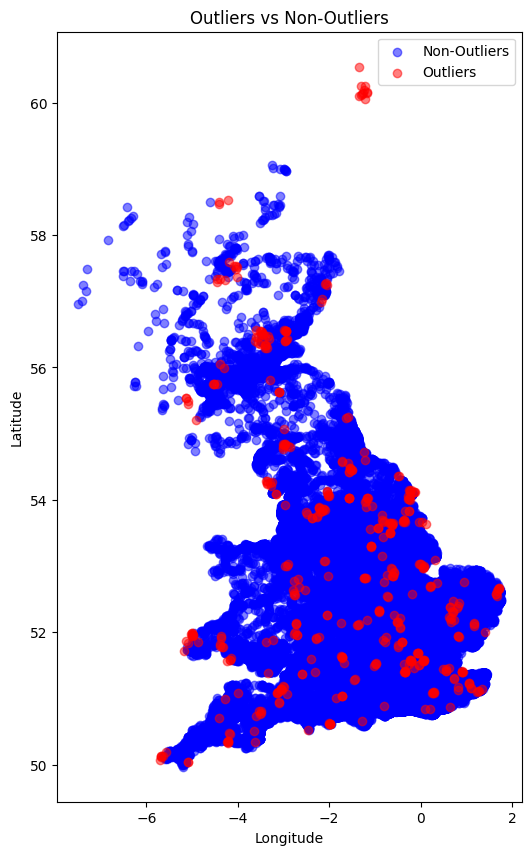

In [76]:
# Plotting the outliers and non-outliers
plt.figure(figsize=(6, 10))
plt.scatter(non_outliers["longitude"], non_outliers["latitude"], c='blue', label='Non-Outliers', alpha=0.5)
plt.scatter(outliers["longitude"], outliers["latitude"], c='red', label='Outliers', alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Outliers vs Non-Outliers")
plt.legend()
plt.show()

The map highlights that a substantial number of data points, flagged as outliers by the Local Outlier Factor algorithm, don't exhibit notable deviations from the general point distribution. Nonetheless, certain data points located in the upper right corner of the map exhibit noticeable deviations from the bulk of points. Investigating these divergent points may reveal potential outliers warranting further scrutiny.

### 7. Classification Model: Accurately predicting fatal injuries sustained in road traffic accidents
A thoughtful selection process has identified a set of thirty-one (31) pertinent features drawn from the accident, vehicle, and casualty tables. The criteria for selection were guided by the anticipated influence of these features on the prediction of accident severity.

In [77]:
cur.execute("""
SELECT A.longitude, A.latitude, A.speed_limit, A.road_surface_conditions, A.weather_conditions, 
V.towing_and_articulation, V.hit_object_in_carriageway, A.light_conditions, V.vehicle_manoeuvre, 
A.accident_severity, A.time, A.day_of_week, A.road_type, A.junction_detail, A.special_conditions_at_site, 
A.junction_control, A.police_force, A.urban_or_rural_area, A.did_police_officer_attend_scene_of_accident, 
V.sex_of_driver, V.age_of_driver, V.driver_imd_decile, V.engine_capacity_cc, 
V.journey_purpose_of_driver, C.casualty_class, C.casualty_severity, C.pedestrian_location, C.pedestrian_movement, 
C.car_passenger, C.bus_or_coach_passenger, C.pedestrian_road_maintenance_worker
FROM Accident A
JOIN Vehicle V ON A.accident_index = V.accident_index
JOIN Casualty C ON A.accident_index = C.accident_index
WHERE A.accident_year = 2020;
""")
accidents_data = cur.fetchall()

# Creating a pandas DataFrame to store the results
columns = ["longitude", "latitude", "speed_limit", "road_surface_conditions", "weather_conditions", 
           "towing_and_articulation", "hit_object_in_carriageway", "light_conditions", "vehicle_manoeuvre", 
           "accident_severity", "time", "day_of_week", "road_type", "junction_detail", "special_conditions_at_site", 
           "junction_control", "police_force", "urban_or_rural_area", "did_police_officer_attend_scene_of_accident", 
           "sex_of_driver", "age_of_driver", "driver_imd_decile", "engine_capacity_cc", 
           "journey_purpose_of_driver", "casualty_class", "casualty_severity", "pedestrian_location", "pedestrian_movement", 
           "car_passenger", "bus_or_coach_passenger", "pedestrian_road_maintenance_worker"]
df = pd.DataFrame(accidents_data, columns=columns)

In [78]:
# Displaying the dataframe
df.head()

longitude   latitude  speed_limit  road_surface_conditions  \
0  -0.254001  51.462262           20                        9   
1  -0.139253  51.470327           20                        1   
2  -0.139253  51.470327           20                        1   
3  -0.178719  51.529614           30                        2   
4  -0.001683  51.541210           30                        1   

   weather_conditions  towing_and_articulation  hit_object_in_carriageway  \
0                   9                        9                          0   
1                   1                        0                          0   
2                   1                        0                          0   
3                   1                        0                          0   
4                   1                        0                          0   

   light_conditions  vehicle_manoeuvre  accident_severity  ...  \
0                 1                  5                  3  ...   
1                 1                  4                  3  ...   
2                 1                  4                  3  ...   
3                 4                 18                  3  ...   
4                 4                 18                  2  ...   

  driver_imd_decile  engine_capacity_cc  journey_purpose_of_driver  \
0                 4                1968                          6   
1                 7                1395                          2   
2                 7                1395                          2   
3                -1                  -1                          6   
4                 2                1798                          1   

   casualty_class  casualty_severity  pedestrian_location  \
0               3                  3                    9   
1               3                  3                    1   
2               3                  3                    1   
3               3                  3                    5   
4               3                  2                    4   

   pedestrian_movement  car_passenger  bus_or_coach_passenger  \
0                    5              0                       0   
1                    1              0                       0   
2                    1              0                       0   
3                    9              0                       0   
4                    1              0                       0   

   pedestrian_road_maintenance_worker  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 31 columns]

### Feature Engineering

In [79]:
# Extracting the hour feature from the time feature
df['hour'] = pd.to_datetime(df['time'], format="%H:%M").dt.hour

In [80]:
# Dropping the time feature
df = df.drop("time", axis=1)

- The time feature was dropped from the dataframe since it will not be used to build the classification model.

### Data Cleaning

In [81]:
# Checking for duplicate rows in the dataframe
df.duplicated().sum()

22258

- A total of 22,258 duplicate records have been identified in the combined dataframe obtained from table joins. Consequently, these duplicate entries will be removed prior to constructing the classification model.

In [82]:
# Dropping the duplicate rows
df = df.drop_duplicates()

In [83]:
# Confirming if the rows have been dropped
df.duplicated().sum()

0

- It's evident from the result above that the duplicate records have been dropped.

In [84]:
# Checking for missing values in the dataframe
df.isnull().sum()

longitude                                      29
latitude                                       29
speed_limit                                     0
road_surface_conditions                         0
weather_conditions                              0
towing_and_articulation                         0
hit_object_in_carriageway                       0
light_conditions                                0
vehicle_manoeuvre                               0
accident_severity                               0
day_of_week                                     0
road_type                                       0
junction_detail                                 0
special_conditions_at_site                      0
junction_control                                0
police_force                                    0
urban_or_rural_area                             0
did_police_officer_attend_scene_of_accident     0
sex_of_driver                                   0
age_of_driver                                   0


- Within the dataframe resulting from the table joins, there are 29 instances of missing values detected in the longitude and latitude features. Therefore, the subsequent steps will address the process of filling these missing values.

In [85]:
# Inspecting the rows with the missing values
null_rows = df[df.isnull().any(axis=1)]
null_rows[["longitude", "latitude", "police_force"]]

longitude  latitude  police_force
57197         NaN       NaN             5
57198         NaN       NaN             5
67235         NaN       NaN             7
67236         NaN       NaN             7
74986         NaN       NaN            12
74988         NaN       NaN            12
77129         NaN       NaN            13
77130         NaN       NaN            13
196628        NaN       NaN            52
196630        NaN       NaN            52
196632        NaN       NaN            52
209338        NaN       NaN            62
209339        NaN       NaN            62
209766        NaN       NaN            63
209767        NaN       NaN            63
209784        NaN       NaN            63
209785        NaN       NaN            63
209828        NaN       NaN            63
209829        NaN       NaN            63
209911        NaN       NaN            63
210122        NaN       NaN            63
210123        NaN       NaN            63
210652        NaN       NaN            63
210653        NaN       NaN            63
210654        NaN       NaN            63
210655        NaN       NaN            63
210676        NaN       NaN            63
210677        NaN       NaN            63
211315        NaN       NaN            63

- Based on the outcome shown above, it is evident that there are 16 accidents with absent longitude and latitude coordinates, all of which are associated with a police force code of 63. As a reasonable assumption, we can proceed to substitute the missing coordinates with the average coordinates derived from accidents attributed to a police force code of 63. This methodology will be uniformly applied to address the other instances of missing coordinates by utilizing the average coordinates specific to their respective accidents.

In [86]:
# Filling the missing values in the Longitude and Latitude
"""
In order to address the missing values in the longitude and latitude, I defined a function 
calculate_and_fill_mean_longitude_latitude that takes a DataFrame and a police code as input. 
The function calculates the mean longitude and mean latitude for accidents with the given police code, 
and then fills the missing values in the original DataFrame's "longitude" and "latitude" columns with 
these means. The inplace=True parameter ensures that the changes are applied to the original DataFrame.
"""

# Defining a function to fill the missing values
def calculate_and_fill_mean_longitude_latitude(dataframe, police_code):
    accident_police_df = dataframe[dataframe["police_force"] == police_code]
    longitude_mean = round(accident_police_df["longitude"].mean(), 6)
    latitude_mean = round(accident_police_df["latitude"].mean(), 6)
    
    dataframe["longitude"].fillna(longitude_mean, inplace=True)
    dataframe["latitude"].fillna(latitude_mean, inplace=True)
    
    return dataframe

# Replacing all the missing values in the longitutde and latitude
df = calculate_and_fill_mean_longitude_latitude(df, 63)
df = calculate_and_fill_mean_longitude_latitude(df, 62)
df = calculate_and_fill_mean_longitude_latitude(df, 52)
df = calculate_and_fill_mean_longitude_latitude(df, 13)
df = calculate_and_fill_mean_longitude_latitude(df, 12)
df = calculate_and_fill_mean_longitude_latitude(df, 7)
df = calculate_and_fill_mean_longitude_latitude(df, 5)

In [87]:
# Checking the data description
df.describe()

longitude       latitude    speed_limit  road_surface_conditions  \
count  198177.000000  198177.000000  198177.000000            198177.000000   
mean       -1.194420      52.355404      37.331809                 1.378566   
std         1.366237       1.318888      14.394373                 0.877520   
min        -7.497375      49.970479      -1.000000                -1.000000   
25%        -2.111149      51.457536      30.000000                 1.000000   
50%        -1.073181      51.805636      30.000000                 1.000000   
75%        -0.125263      53.309626      40.000000                 2.000000   
max         1.756257      60.541144      70.000000                 9.000000   

       weather_conditions  towing_and_articulation  hit_object_in_carriageway  \
count       198177.000000            198177.000000              198177.000000   
mean             1.668448                 0.203454                   7.204630   
std              1.791129                 1.282881                  25.044899   
min             -1.000000                -1.000000                  -1.000000   
25%              1.000000                 0.000000                   0.000000   
50%              1.000000                 0.000000                   0.000000   
75%              1.000000                 0.000000                   0.000000   
max              9.000000                 9.000000                  99.000000   

       light_conditions  vehicle_manoeuvre  accident_severity  ...  \
count     198177.000000      198177.000000      198177.000000  ...   
mean           2.046206          19.043718           2.749371  ...   
std            1.730666          22.721585           0.476903  ...   
min           -1.000000          -1.000000           1.000000  ...   
25%            1.000000           9.000000           3.000000  ...   
50%            1.000000          18.000000           3.000000  ...   
75%            4.000000          18.000000           3.000000  ...   
max            7.000000          99.000000           3.000000  ...   

       engine_capacity_cc  journey_purpose_of_driver  casualty_class  \
count       198177.000000              198177.000000   198177.000000   
mean          1383.171776                   4.733763        1.347629   
std           1543.972012                   1.899093        0.619293   
min             -1.000000                  -1.000000        1.000000   
25%            124.000000                   5.000000        1.000000   
50%           1395.000000                   6.000000        1.000000   
75%           1956.000000                   6.000000        2.000000   
max          17696.000000                   6.000000        3.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  \
count      198177.000000        198177.000000        198177.000000   
mean            2.803665             0.437422             0.354749   
std             0.427912             1.680574             1.526353   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger  \
count   198177.00000           198177.000000   
mean         0.22435                0.024140   
std          0.58429                0.301516   
min         -1.00000               -1.000000   
25%          0.00000                0.000000   
50%          0.00000                0.000000   
75%          0.00000                0.000000   
max          9.00000                9.000000   

       pedestrian_road_maintenance_worker           hour  
count                       198177.000000  198177.000000  
mean                             0.008023      13.891577  
std                              0.130389       

- Based on the outcome presented, a significant number of features in the dataframe exhibit -1 entries as their minimum values. Consequently, the -1 entries will undergo replacement as part of the data preprocessing procedure.

In [88]:
# Replacing the -1 entries in the dataframe
"""
The missing values represented as -1 in the specified features of the dataframe will be imputed using the mode for 
each feature, except for the "age_of_vehicle" and "age_of_driver" features. These two features will be imputed with 
their respective median values. These imputation methods have been chosen due to their effectiveness and suitability 
for this scenario. By replacing -1 entries in the "age_of_vehicle" and "age_of_driver" features with median values, 
the original data distribution will be preserved. Additionally, using median values ensures robustness to outliers, 
which can lead to more accurate imputations.
"""

# Listing of features to fill
features_to_fill = ["longitude", "latitude", "speed_limit", "road_surface_conditions", "weather_conditions",
                    "towing_and_articulation", "hit_object_in_carriageway", "light_conditions", "vehicle_manoeuvre",
                    "accident_severity", "day_of_week", "road_type", "junction_detail", "special_conditions_at_site",
                    "junction_control", "police_force", "urban_or_rural_area", "did_police_officer_attend_scene_of_accident",
                    "sex_of_driver", "driver_imd_decile", "engine_capacity_cc",
                    "journey_purpose_of_driver", "casualty_class", "casualty_severity", "pedestrian_location", "pedestrian_movement",
                    "car_passenger", "bus_or_coach_passenger", "pedestrian_road_maintenance_worker"]

# Filling -1 entries with the modal value of each feature
for feature in features_to_fill:
    mode_value = df[feature].mode()[0]
    df[feature].replace(-1, mode_value, inplace=True)

# Filling age_of_driver and age_of_vehicle with their respective medians
age_of_driver_median = df["age_of_driver"].median()
# age_of_vehicle_median = df["age_of_vehicle"].median()
df["age_of_driver"].replace(-1, age_of_driver_median, inplace=True)
#df["age_of_vehicle"].replace(-1, age_of_vehicle_median, inplace=True)

# Displaying the modified dataframe
df

longitude   latitude  speed_limit  road_surface_conditions  \
0       -0.254001  51.462262           20                        9   
1       -0.139253  51.470327           20                        1   
3       -0.178719  51.529614           30                        2   
4       -0.001683  51.541210           30                        1   
5       -0.137592  51.515704           30                        1   
...           ...        ...          ...                      ...   
220430  -2.271903  57.186317           60                        1   
220431  -2.271903  57.186317           60                        1   
220432  -3.968753  55.950940           30                        1   
220433  -3.968753  55.950940           30                        1   
220434  -4.561040  56.003843           30                        1   

        weather_conditions  towing_and_articulation  \
0                        9                        9   
1                        1                        0   
3                        1                        0   
4                        1                        0   
5                        1                        0   
...                    ...                      ...   
220430                   1                        0   
220431                   1                        0   
220432                   1                        0   
220433                   1                        0   
220434                   1                        0   

        hit_object_in_carriageway  light_conditions  vehicle_manoeuvre  \
0                               0                 1                  5   
1                               0                 1                  4   
3                               0                 4                 18   
4                               0                 4                 18   
5                               0                 4                 18   
...                           ...               ...                ...   
220430                          0                 1                  7   
220431                          0                 1                 16   
220432                          0                 1                  7   
220433                          0                 1                 18   
220434                         12                 1                  1   

        accident_severity  ...  engine_capacity_cc  journey_purpose_of_driver  \
0                       3  ...                1968                          6   
1                       3  ...                1395                          2   
3                       3  ...                  -1                          6   
4                       2  ...                1798                          1   
5                       3  ...                2993                          6   
...                   ...  ...                 ...                        ...   
220430                  2  ...                1968                          1   
220431                  2  ...                1301                          5   
220432                  3  ...                1995                          6   
220433                  3  ...                  -1                          6   
220434                  3  ...                 999                          6   

        casualty_class  casualty_severity  pedestrian_location  \
0                    3                  3                    9   
1                    3                  3                    1   
3                    3                  3                    5   
4                    3                  2                    4   
5                    3                  3                    6   
...                ...                ...                  ...   
220430               1                  2                    0   
220431               1                  2                    0   
220432               1                  3         

### Correlation Analysis

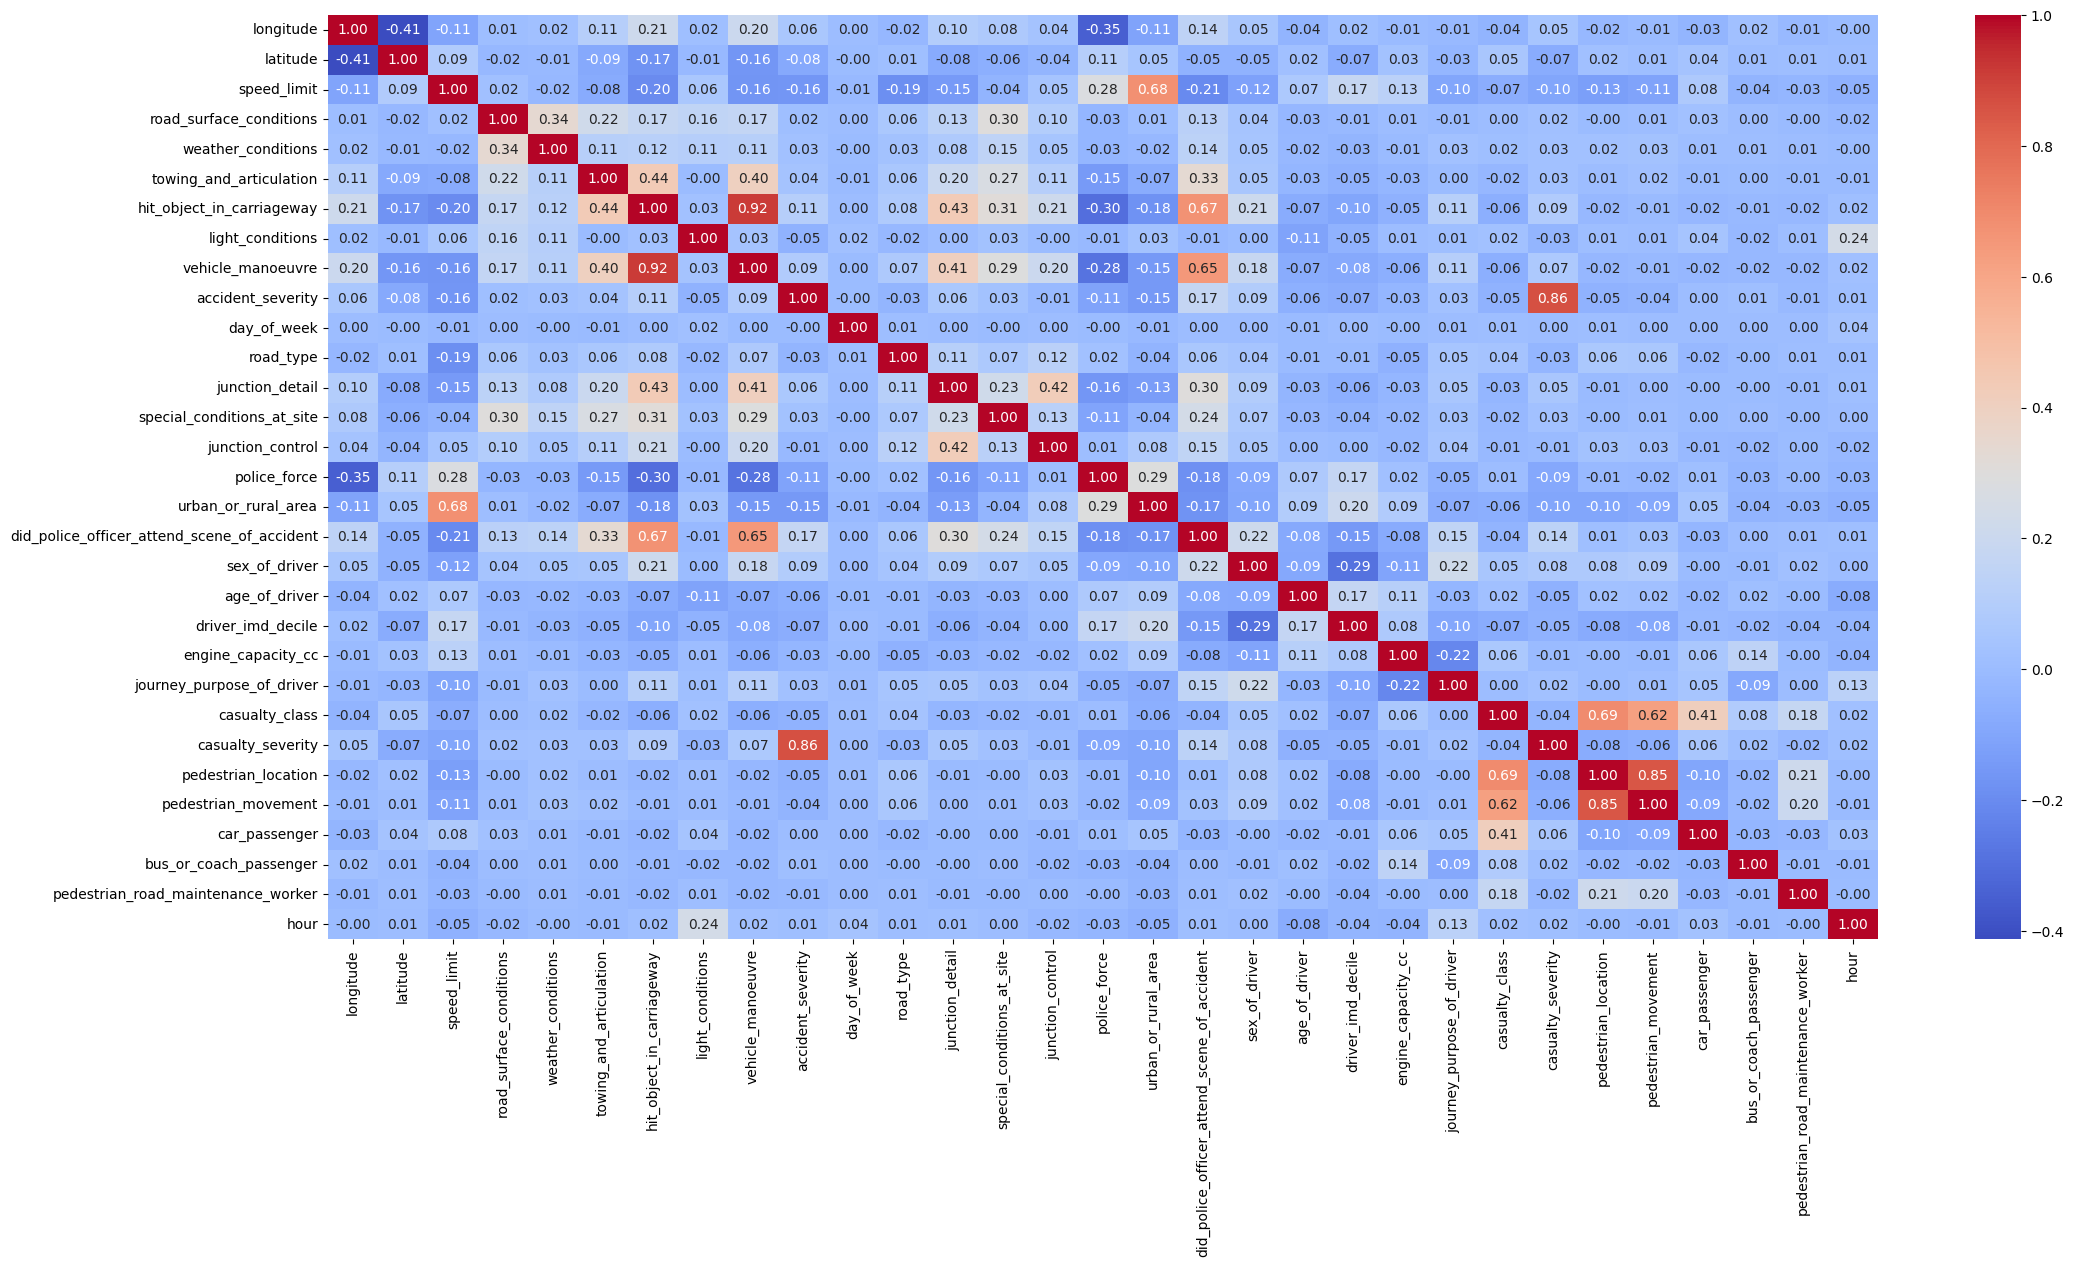

In [89]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- The dataset features display negative and weak positive correlations with the target feature (accident_severity) except casualty severity which has a very strong correlation with the target. This implies that the choice of features for the classification model is not immediately evident. Therefore, in the initial stage, all features will be included in the classification model, while subsequent enhancements such as data balancing and feature importance analysis will be implemented to refine the model's performance. In order to prevent model overfitting, we decided to exclude casualty severity from the analysis, as its values closely resemble those in the target variable, accident severity.

### Data Preprocessing

In [90]:
# Preparing data for modeling
X = df.drop(['accident_severity', 'casualty_severity'], axis=1)
y = df['accident_severity']

In [91]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<IPython.core.display.Javascript object>

In [92]:
# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [93]:
# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Model Prediction

In [94]:
# Making predictions on the train split set
y_pred_train = model.predict(X_train_scaled)

# Making predictions on the test split set
y_pred_test = model.predict(X_test_scaled)

### Model Evaluation

In [95]:
from sklearn.metrics import classification_report

# Model Performance Assessment for the train split set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_classification_rep = classification_report(y_train, y_pred_train)

print("Accuracy of the Train Split Set:", train_accuracy)
print("Classification Report of the Train Split Set:\n", train_classification_rep)


# Model Performance Assessment for the test split set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_classification_rep = classification_report(y_test, y_pred_test)

print("Accuracy of the Test Split Set:", test_accuracy)
print("Classification Report of the Test Split Set:\n", test_classification_rep)

Accuracy of the Train Split Set: 0.9999684624166619
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3141
           2       1.00      1.00      1.00     33453
           3       1.00      1.00      1.00    121947

    accuracy                           1.00    158541
   macro avg       1.00      1.00      1.00    158541
weighted avg       1.00      1.00      1.00    158541

Accuracy of the Test Split Set: 0.8555353718841457
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       0.99      0.53      0.69       785
           2       0.90      0.40      0.55      8364
           3       0.85      0.99      0.91     30487

    accuracy                           0.86     39636
   macro avg       0.92      0.64      0.72     39636
weighted avg       0.86      0.86      0.83     39636



- While the test accuracy stands at 85%, the recall and f1 score are comparatively lower, at 53% and 69% respectively. To enhance the model, data balancing and feature importance techniques will be applied.

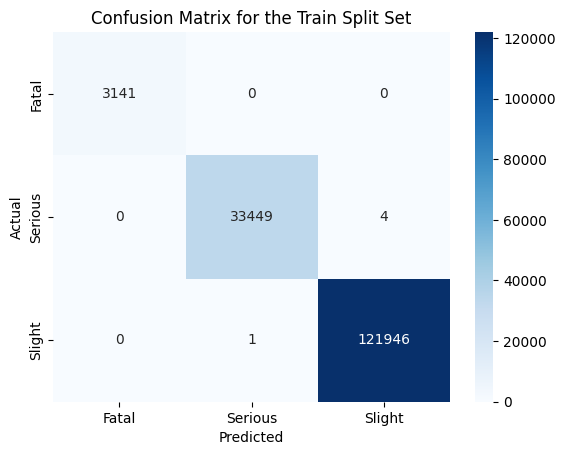

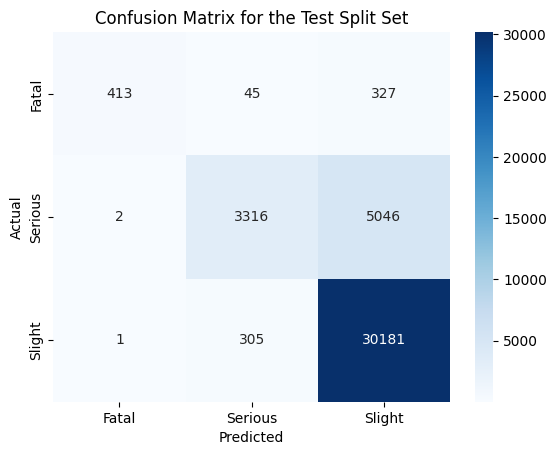

In [96]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Improvement by Data Balancing(SMOTE)

In [97]:
# Instantiating the SMOTE algorithm
smote = SMOTE(random_state=42)

# Applying SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Printing the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", y_resampled.value_counts())

Class distribution before SMOTE: accident_severity
3    152434
2     41817
1      3926
Name: count, dtype: int64
Class distribution after SMOTE: accident_severity
3    152434
2    152434
1    152434
Name: count, dtype: int64


### Data Preprocessing

In [98]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [99]:
# Normalizing the features
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

### Model Training

In [100]:
# Training a Random Forest Classifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train_scaled2, y_train)

RandomForestClassifier(random_state=42)

### Model Prediction

In [101]:
# Making predictions on the train split set
y_pred_train2 = model2.predict(X_train_scaled2)

# Making predictions on the test split set
y_pred_test2 = model2.predict(X_test_scaled2)

### Model Evaluation

In [102]:
# Model Performance Assessment for the train split set
train_accuracy2 = accuracy_score(y_train, y_pred_train2)
train_classification_rep2 = classification_report(y_train, y_pred_train2)

print("Accuracy of the Train Split Set:", train_accuracy2)
print("Classification Report of the Train Split Set:\n", train_classification_rep2)


# Model Performance Assessment for the test split set
test_accuracy2 = accuracy_score(y_test, y_pred_test2)
test_classification_rep2 = classification_report(y_test, y_pred_test2)

print("Accuracy of the Test Split Set:", test_accuracy2)
print("Classification Report of the Test Split Set:\n", test_classification_rep2)

Accuracy of the Train Split Set: 0.9999890662883603
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    121927
           2       1.00      1.00      1.00    121933
           3       1.00      1.00      1.00    121981

    accuracy                           1.00    365841
   macro avg       1.00      1.00      1.00    365841
weighted avg       1.00      1.00      1.00    365841

Accuracy of the Test Split Set: 0.924306535025858
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99     30507
           2       0.90      0.88      0.89     30501
           3       0.89      0.90      0.89     30453

    accuracy                           0.92     91461
   macro avg       0.92      0.92      0.92     91461
weighted avg       0.92      0.92      0.92     91461



- This outcome indicates a significant improvement in the model's performance. The accuracy has surged from 85% to 92%, and both the recall and f1 score have risen to 99% for the fatal class of accident severity.

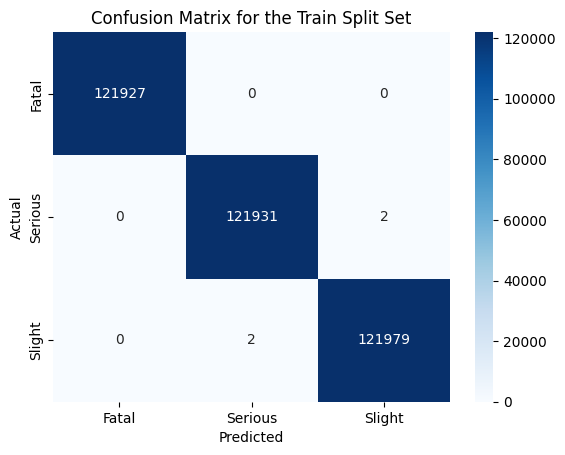

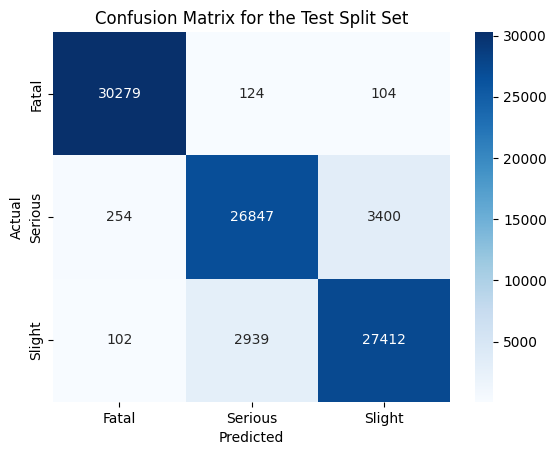

In [103]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train2)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test2)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Improvement by Feature Importance

In [104]:
X = df.drop(['accident_severity', 'casualty_severity'], axis=1)
y = df['accident_severity']

# Feature importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

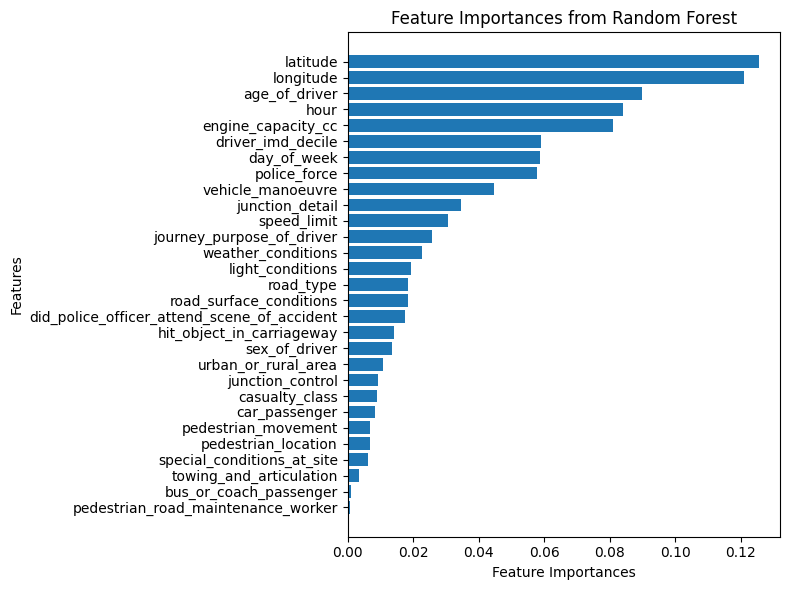

In [105]:
# Sorting the feature_importance indices and values in ascending order
sorted_indices = feature_importances.argsort()
sorted_values = feature_importances[sorted_indices]

# Creating a horizontal bar plot for feature importances
plt.figure(figsize=(8, 6))
plt.barh(X.columns[sorted_indices], sorted_values)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

In [106]:
# Preparing data for modeling and dropping variables with less feature importance
X = df.drop(['accident_severity', 'casualty_severity', 'junction_control', 'casualty_class', 'car_passenger', 
             'pedestrian_movement', 'pedestrian_location', 'special_conditions_at_site', 'towing_and_articulation',
            'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker'], axis=1)
y = df['accident_severity']

In [107]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<IPython.core.display.Javascript object>

In [108]:
# Normalizing the features
scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train)
X_test_scaled3 = scaler3.transform(X_test)

In [109]:
# Training a Random Forest Classifier
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_scaled3, y_train)

RandomForestClassifier(random_state=42)

In [110]:
# Making predictions on the train split set
y_pred_train3 = model3.predict(X_train_scaled3)

# Making predictions on the test split set
y_pred_test3 = model3.predict(X_test_scaled3)

In [111]:
# Model Performance Assessment for the train split set
train_accuracy3 = accuracy_score(y_train, y_pred_train3)
train_classification_rep3 = classification_report(y_train, y_pred_train3)

print("Accuracy of the Train Split Set:", train_accuracy3)
print("Classification Report of the Train Split Set:\n", train_classification_rep3)


# Model Performance Assessment for the test split set
test_accuracy3 = accuracy_score(y_test, y_pred_test3)
test_classification_rep3 = classification_report(y_test, y_pred_test3)

print("Accuracy of the Test Split Set:", test_accuracy3)
print("Classification Report of the Test Split Set:\n", test_classification_rep3)

Accuracy of the Train Split Set: 0.9999684624166619
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3141
           2       1.00      1.00      1.00     33453
           3       1.00      1.00      1.00    121947

    accuracy                           1.00    158541
   macro avg       1.00      1.00      1.00    158541
weighted avg       1.00      1.00      1.00    158541

Accuracy of the Test Split Set: 0.8623978201634878
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       1.00      0.58      0.73       785
           2       0.92      0.42      0.58      8364
           3       0.85      0.99      0.92     30487

    accuracy                           0.86     39636
   macro avg       0.92      0.66      0.74     39636
weighted avg       0.87      0.86      0.84     39636



- The test accuracy saw a slight boost from 85.5% to 86%, accompanied by increased recall and f1 scores of 58% and 73%, respectively, compared to when feature importance was not utilized. This suggests that the dropped features had no impact on predicting accident severity.

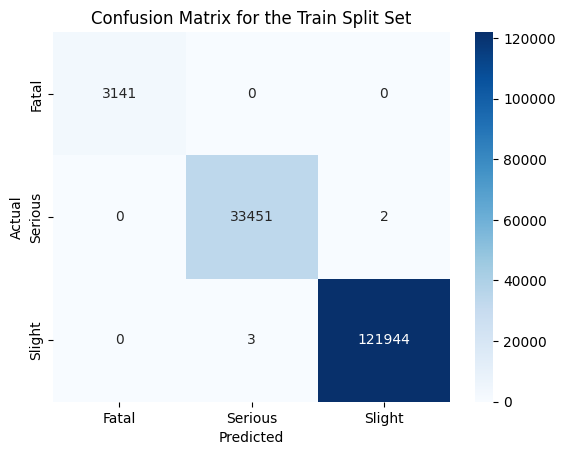

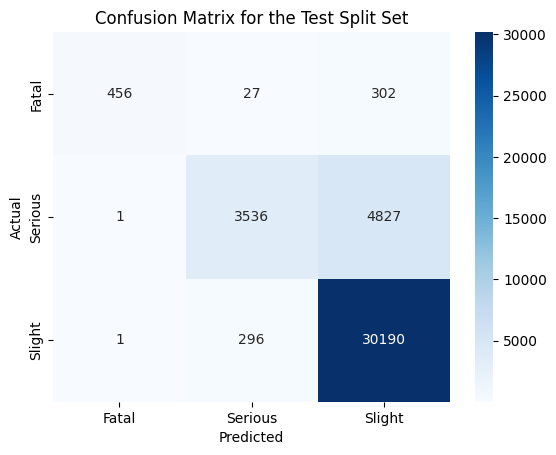

In [112]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train3)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test3)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Data Balancing (SMOTE)

In [113]:
# Preparing data for modeling
X = df.drop(['accident_severity', 'casualty_severity', 'junction_control', 'casualty_class', 'car_passenger', 
             'pedestrian_movement', 'pedestrian_location', 'special_conditions_at_site', 'towing_and_articulation',
            'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker'], axis=1)
y = df['accident_severity']

In [114]:
# Instantiating the SMOTE algorithm
smote2 = SMOTE(random_state=42)

# Applying SMOTE to the dataset
X_resampled2, y_resampled2 = smote2.fit_resample(X, y)

# Printing the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", y_resampled.value_counts())

Class distribution before SMOTE: accident_severity
3    152434
2     41817
1      3926
Name: count, dtype: int64
Class distribution after SMOTE: accident_severity
3    152434
2    152434
1    152434
Name: count, dtype: int64


In [115]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [116]:
# Normalizing the features
scaler4 = StandardScaler()
X_train_scaled4 = scaler4.fit_transform(X_train)
X_test_scaled4 = scaler4.transform(X_test)

In [117]:
# Training a Random Forest Classifier
model4 = RandomForestClassifier(random_state=42)
model4.fit(X_train_scaled4, y_train)

RandomForestClassifier(random_state=42)

In [118]:
# Making predictions on the train split set
y_pred_train4 = model4.predict(X_train_scaled4)

# Making predictions on the test split set
y_pred_test4 = model4.predict(X_test_scaled4)

In [119]:
# Model Performance Assessment for the train split set
train_accuracy4 = accuracy_score(y_train, y_pred_train4)
train_classification_rep4 = classification_report(y_train, y_pred_train4)

print("Accuracy of the Train Split Set:", train_accuracy4)
print("Classification Report of the Train Split Set:\n", train_classification_rep4)


# Model Performance Assessment for the test split set
test_accuracy4 = accuracy_score(y_test, y_pred_test4)
test_classification_rep4 = classification_report(y_test, y_pred_test4)

print("Accuracy of the Test Split Set:", test_accuracy4)
print("Classification Report of the Test Split Set:\n", test_classification_rep4)

Accuracy of the Train Split Set: 0.9999835994325403
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    121927
           2       1.00      1.00      1.00    121933
           3       1.00      1.00      1.00    121981

    accuracy                           1.00    365841
   macro avg       1.00      1.00      1.00    365841
weighted avg       1.00      1.00      1.00    365841

Accuracy of the Test Split Set: 0.9248422825029248
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99     30507
           2       0.90      0.88      0.89     30501
           3       0.89      0.90      0.90     30453

    accuracy                           0.92     91461
   macro avg       0.92      0.92      0.92     91461
weighted avg       0.92      0.92      0.92     91461



- The test accuracy saw a very slight boost from 92.4% to 92.5%, accompanied by recall and f1 scores of 99%, compared to when feature importance was not utilized. This suggests that the dropped features had no impact on predicting accident severity.

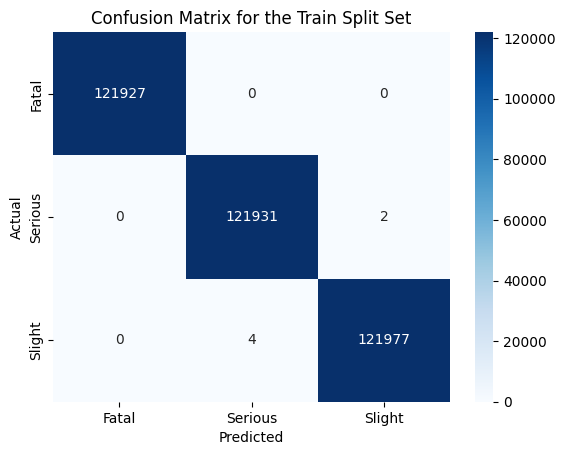

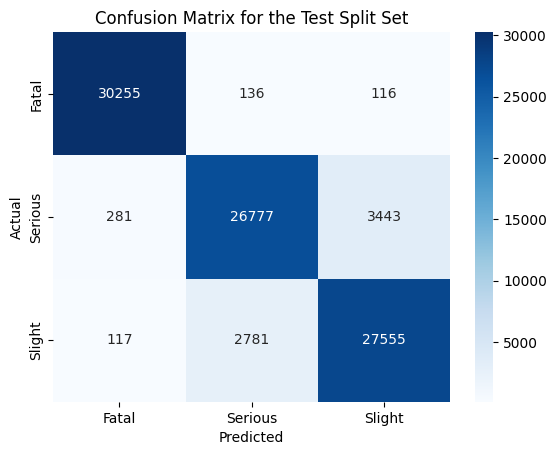

In [120]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train4)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test4)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression + SMOTE

In [121]:
# Training a Logistic Regression Classifier
model5 = LogisticRegression(random_state=42)
model5.fit(X_train_scaled2, y_train)

LogisticRegression(random_state=42)

In [122]:
# Making predictions on the train split set
y_pred_train5 = model5.predict(X_train_scaled2)

# Making predictions on the test split set
y_pred_test5 = model5.predict(X_test_scaled2)

In [123]:
# Model Performance Assessment for the train split set
train_accuracy5 = accuracy_score(y_train, y_pred_train5)
train_classification_rep5 = classification_report(y_train, y_pred_train5)

print("Accuracy of the Train Split Set:", train_accuracy5)
print("Classification Report of the Train Split Set:\n", train_classification_rep5)


# Model Performance Assessment for the test split set
test_accuracy5 = accuracy_score(y_test, y_pred_test5)
test_classification_rep5 = classification_report(y_test, y_pred_test5)

print("Accuracy of the Test Split Set:", test_accuracy5)
print("Classification Report of the Test Split Set:\n", test_classification_rep5)

Accuracy of the Train Split Set: 0.5663252615207153
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       0.59      0.68      0.63    121927
           2       0.46      0.43      0.44    121933
           3       0.64      0.59      0.62    121981

    accuracy                           0.57    365841
   macro avg       0.56      0.57      0.56    365841
weighted avg       0.56      0.57      0.56    365841

Accuracy of the Test Split Set: 0.5679469938006363
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       0.59      0.68      0.63     30507
           2       0.47      0.43      0.45     30501
           3       0.64      0.60      0.62     30453

    accuracy                           0.57     91461
   macro avg       0.57      0.57      0.57     91461
weighted avg       0.57      0.57      0.57     91461



- Logistic Regression with a test accuracy of 57% exhibited unsatisfactory performance, with all metrics significantly lower when compared to those achieved by the Random Forest Classifier.

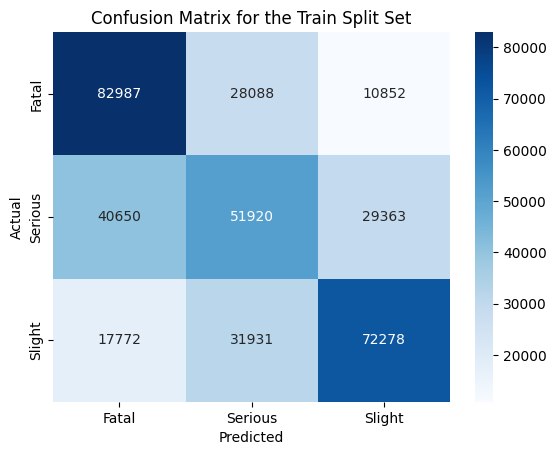

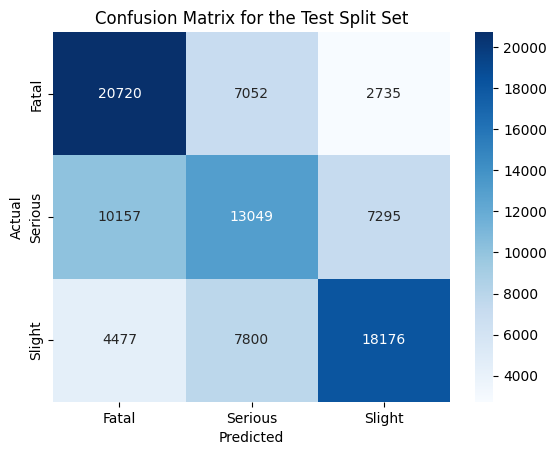

In [124]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train5)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test5)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression + SMOTE + Feature Importance

In [125]:
# Training a Logistic Regression Classifier
model6 = LogisticRegression(random_state=42)
model6.fit(X_train_scaled4, y_train)

LogisticRegression(random_state=42)

In [126]:
# Making predictions on the train split set
y_pred_train6 = model6.predict(X_train_scaled4)

# Making predictions on the test split set
y_pred_test6 = model6.predict(X_test_scaled4)

In [127]:
# Model Performance Assessment for the train split set
train_accuracy6 = accuracy_score(y_train, y_pred_train6)
train_classification_rep6 = classification_report(y_train, y_pred_train6)

print("Accuracy of the Train Split Set:", train_accuracy6)
print("Classification Report of the Train Split Set:\n", train_classification_rep6)


# Model Performance Assessment for the test split set
test_accuracy6 = accuracy_score(y_test, y_pred_test6)
test_classification_rep6 = classification_report(y_test, y_pred_test6)

print("Accuracy of the Test Split Set:", test_accuracy6)
print("Classification Report of the Test Split Set:\n", test_classification_rep6)

Accuracy of the Train Split Set: 0.5573951525389446
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       0.58      0.68      0.62    121927
           2       0.46      0.42      0.44    121933
           3       0.64      0.57      0.60    121981

    accuracy                           0.56    365841
   macro avg       0.56      0.56      0.55    365841
weighted avg       0.56      0.56      0.55    365841

Accuracy of the Test Split Set: 0.5585003444090924
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       0.58      0.68      0.62     30507
           2       0.46      0.42      0.44     30501
           3       0.64      0.58      0.61     30453

    accuracy                           0.56     91461
   macro avg       0.56      0.56      0.56     91461
weighted avg       0.56      0.56      0.56     91461



 - With feature importance being utilized, the model performance declined and exhibited unsatisfactory performance, with all metrics significantly lower when compared to those achieved by the Random Forest Classifier.

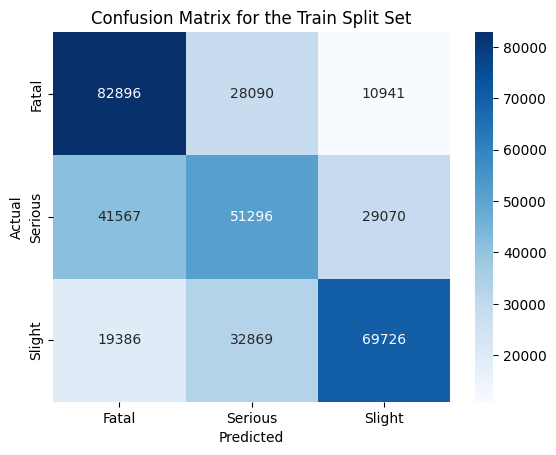

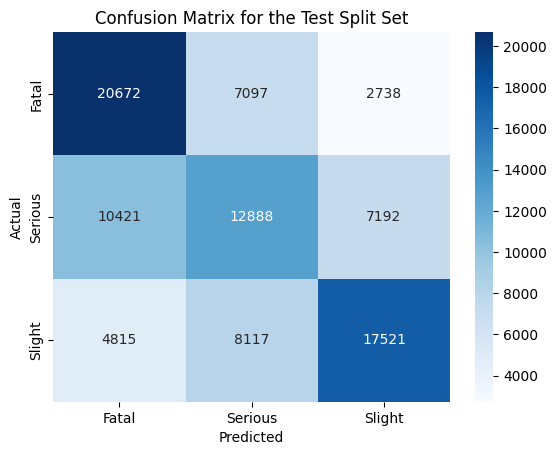

In [128]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train6)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test6)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Gradient Boosting Classifier + SMOTE

In [129]:
# Training a Gradient Boosting Classifier
model7 = GradientBoostingClassifier(random_state=42)
model7.fit(X_train_scaled2, y_train)

GradientBoostingClassifier(random_state=42)

In [130]:
# Making predictions on the train split set
y_pred_train7 = model7.predict(X_train_scaled2)

# Making predictions on the test split set
y_pred_test7 = model7.predict(X_test_scaled2)

In [131]:
# Model Performance Assessment for the train split set
train_accuracy7 = accuracy_score(y_train, y_pred_train7)
train_classification_rep7 = classification_report(y_train, y_pred_train7)

print("Accuracy of the Train Split Set:", train_accuracy7)
print("Classification Report of the Train Split Set:\n", train_classification_rep7)


# Model Performance Assessment for the test split set
test_accuracy7 = accuracy_score(y_test, y_pred_test7)
test_classification_rep7 = classification_report(y_test, y_pred_test7)

print("Accuracy of the Test Split Set:", test_accuracy7)
print("Classification Report of the Test Split Set:\n", test_classification_rep7)

Accuracy of the Train Split Set: 0.6550687320447954
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       0.67      0.76      0.71    121927
           2       0.58      0.47      0.52    121933
           3       0.70      0.73      0.71    121981

    accuracy                           0.66    365841
   macro avg       0.65      0.66      0.65    365841
weighted avg       0.65      0.66      0.65    365841

Accuracy of the Test Split Set: 0.6545850143777129
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       0.67      0.76      0.71     30507
           2       0.58      0.48      0.52     30501
           3       0.70      0.73      0.71     30453

    accuracy                           0.65     91461
   macro avg       0.65      0.65      0.65     91461
weighted avg       0.65      0.65      0.65     91461



- Gradient Boosting with test accuracy of 65% performed better than Logistic Regression but exhibited unsatisfactory performance, with all metrics significantly lower when compared to those achieved by the Random Forest Classifier.

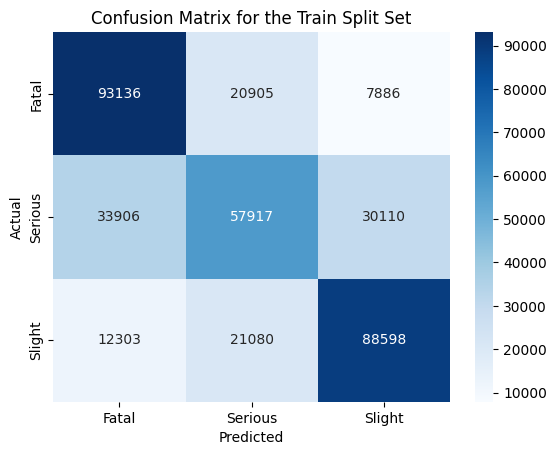

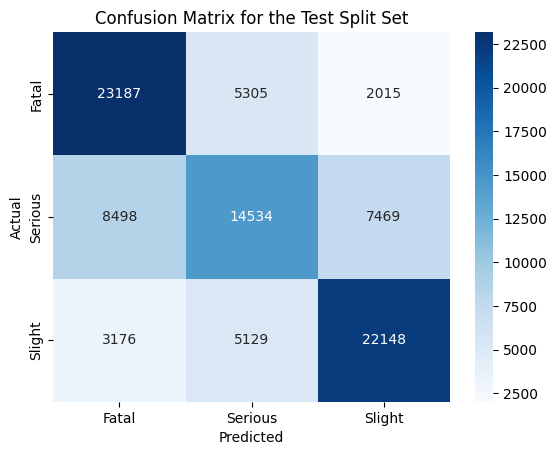

In [132]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train7)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test7)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Gradient Boosting + SMOTE + Feature Importance

In [133]:
# Training a Gradient Boosting Classifier
model8 = GradientBoostingClassifier(random_state=42)
model8.fit(X_train_scaled4, y_train)

GradientBoostingClassifier(random_state=42)

In [134]:
# Making predictions on the train split set
y_pred_train8 = model8.predict(X_train_scaled4)

# Making predictions on the test split set
y_pred_test8 = model8.predict(X_test_scaled4)

In [135]:
# Model Performance Assessment for the train split set
train_accuracy8 = accuracy_score(y_train, y_pred_train8)
train_classification_rep8 = classification_report(y_train, y_pred_train8)

print("Accuracy of the Train Split Set:", train_accuracy8)
print("Classification Report of the Train Split Set:\n", train_classification_rep8)


# Model Performance Assessment for the test split set
test_accuracy8 = accuracy_score(y_test, y_pred_test8)
test_classification_rep8 = classification_report(y_test, y_pred_test8)

print("Accuracy of the Test Split Set:", test_accuracy8)
print("Classification Report of the Test Split Set:\n", test_classification_rep8)

Accuracy of the Train Split Set: 0.644821110810434
Classification Report of the Train Split Set:
               precision    recall  f1-score   support

           1       0.66      0.75      0.70    121927
           2       0.57      0.48      0.52    121933
           3       0.69      0.71      0.70    121981

    accuracy                           0.64    365841
   macro avg       0.64      0.64      0.64    365841
weighted avg       0.64      0.64      0.64    365841

Accuracy of the Test Split Set: 0.6435311225549688
Classification Report of the Test Split Set:
               precision    recall  f1-score   support

           1       0.66      0.75      0.70     30507
           2       0.57      0.47      0.52     30501
           3       0.69      0.71      0.70     30453

    accuracy                           0.64     91461
   macro avg       0.64      0.64      0.64     91461
weighted avg       0.64      0.64      0.64     91461



- With feature importance being utilized, the model performance declined and exhibited unsatisfactory performance, with all metrics significantly lower when compared to those achieved by the Random Forest Classifier.

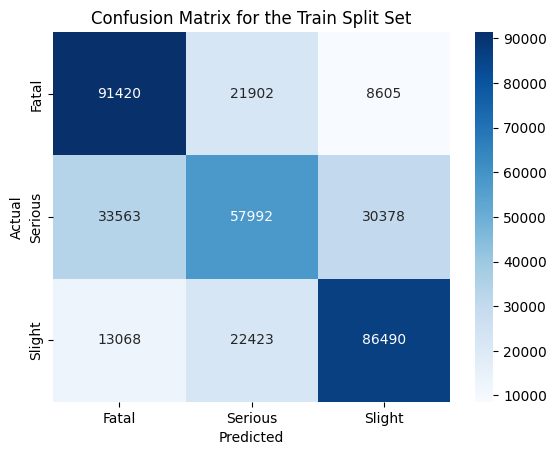

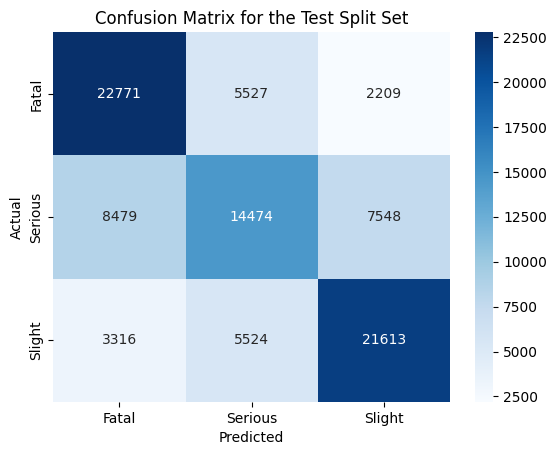

In [136]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train8)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred_test8)
labels = ["Fatal", "Serious", "Slight"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- In general, the Random Forest algorithm demonstrates superior performance and stands out as the most effective among all the algorithms utilized for constructing the models.